In [131]:
import pandas as pd
import base64
import seaborn as sns
import matplotlib.pyplot as plt


### Part 1: How to Data Loading and Exploration
***1. Load three Claims data into pandas dataframes***
- read csv file into variables named `df_header`,`df_line`, and `df_code` respectively

***2. Explore each file data using pandas functions***
***Dataframe validation***
- Output the number of rows and columns for each dataframe using the shape()
- Output the first 5 rows for each dataframe using the head()
- Output the column names and data types using the dtypes()
- Out the number of missing value counts for each dataframe using the isnull() and sum()

_Loading and validating Header data_

Contains one row per claim with high-level information:
- `ProspectiveClaimId`: Unique claim identifier
- `Provider NPIs`: Billing, Attending, Rendering, Referring, Operating providers
- `ServiceFromDate/ServiceToDate`: Service dates
- `PrimaryPayerName/PrimaryPayerCode`: Primary insurance payer
- `PlaceOfService`: Where services were rendered
- `WorkQueName`: Audit/review queue assignment

In [132]:
df_header = pd.read_csv('../content/STONYBRK_20240531_HEADER.csv')
print(df_header.shape)

(388, 43)


In [133]:
print(df_header.head())

   ClientId  ProspectiveClaimId ClaimType  BillingProviderNPI  \
0        49            35216986         P          1154376309   
1        49            35235657         P          1154376309   
2        49            35249003         P          1154376309   
3        49            35249014         P          1154376309   
4        49            35249016         P          1154376309   

               BillingProvFirstName  BillingProvLastName  \
0  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
1  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
2  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
3  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
4  NEW YORK SPINE AND BRAIN SURGERY                  NaN   

   AttendingProviderNPI AttendingProvFirstName AttendingProvLastName  \
0                   NaN                    NaN                   NaN   
1                   NaN                    NaN                   NaN   
2                   NaN         

In [134]:
print(df_header.dtypes)

ClientId                     int64
ProspectiveClaimId           int64
ClaimType                   object
BillingProviderNPI           int64
BillingProvFirstName        object
BillingProvLastName        float64
AttendingProviderNPI       float64
AttendingProvFirstName      object
AttendingProvLastName       object
RenderingProviderNPI         int64
RenderingProvFirstName      object
RenderingProvLastName       object
ReferringProviderNPI       float64
ReferringProvFirstName      object
ReferringProvLastName       object
OperatingProviderNPI       float64
OperatingProvFirstName     float64
OperatingProvLastName      float64
ServiceFromDate             object
ServiceToDate               object
PrimaryPayerName            object
PrimaryPayerCode             int64
PrimaryPayerCFI             object
SecondaryPayer             float64
SecondaryPayerCode         float64
SecondaryPayerCFI          float64
TertianaryPayer            float64
TertianaryPayerCode        float64
TertianaryPayerCFI  

In [135]:
print(df_header.isnull().sum())

ClientId                     0
ProspectiveClaimId           0
ClaimType                    0
BillingProviderNPI           0
BillingProvFirstName         0
BillingProvLastName        388
AttendingProviderNPI       386
AttendingProvFirstName     386
AttendingProvLastName      386
RenderingProviderNPI         0
RenderingProvFirstName       0
RenderingProvLastName        0
ReferringProviderNPI       301
ReferringProvFirstName     301
ReferringProvLastName      301
OperatingProviderNPI       388
OperatingProvFirstName     388
OperatingProvLastName      388
ServiceFromDate              0
ServiceToDate                0
PrimaryPayerName             0
PrimaryPayerCode             0
PrimaryPayerCFI              0
SecondaryPayer             388
SecondaryPayerCode         388
SecondaryPayerCFI          388
TertianaryPayer            388
TertianaryPayerCode        388
TertianaryPayerCFI         388
DRG                        388
AdmitType                  388
DischargeStatus            388
AdmitDx 

In [136]:
df_header['ServiceFromDate'] = pd.to_datetime(df_header['ServiceFromDate'], errors='coerce')
df_header['ServiceToDate'] = pd.to_datetime(df_header['ServiceToDate'], errors='coerce')

min_start_date = df_header['ServiceFromDate'].min()
max_start_date = df_header['ServiceFromDate'].max()
min_end_date = df_header['ServiceToDate'].min()
max_end_date = df_header['ServiceToDate'].max()

print(f"Minimum ServiceFromDate: {min_start_date}")
print(f"Maximum ServiceFromDate: {max_start_date}")
print(f"Minimum ServiceToDate: {min_end_date}")
print(f"Maximum ServiceToDate: {max_end_date}")
#display(df_header['ServiceFromDate'])
#display(df_header['ServiceToDate'])

print(f"The service from date range of the claims is from {min_start_date.strftime('%m-%d-%Y')} to {max_start_date.strftime('%m-%d-%Y')}.")

Minimum ServiceFromDate: 2023-09-25 00:00:00
Maximum ServiceFromDate: 2024-05-29 00:00:00
Minimum ServiceToDate: 2023-09-25 00:00:00
Maximum ServiceToDate: 2024-05-29 00:00:00
The service from date range of the claims is from 09-25-2023 to 05-29-2024.


C:\Users\ylo03\AppData\Local\Temp\ipykernel_32620\1562353343.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_header['ServiceFromDate'] = pd.to_datetime(df_header['ServiceFromDate'], errors='coerce')
C:\Users\ylo03\AppData\Local\Temp\ipykernel_32620\1562353343.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_header['ServiceToDate'] = pd.to_datetime(df_header['ServiceToDate'], errors='coerce')


In [137]:
# Billing providers ordered by max claims
billing_providers = df_header.groupby('BillingProvFirstName').size().reset_index(name='claim_count')
billing_providers = billing_providers.sort_values(by='claim_count', ascending=False)
print(billing_providers)

                  BillingProvFirstName  claim_count
3                        SB INTERNISTS          152
5               SB SURGICAL ASSOCIATES           81
0     NEW YORK SPINE AND BRAIN SURGERY           69
6  UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY           40
4            SB PSYCHIATRIC ASSOCIATES           36
1                SB CHILDREN'S SERVICE            9
2    SB FAMILY AND PREVENTIVE MEDICINE            1


Chart saved as billing_providers_chart.png


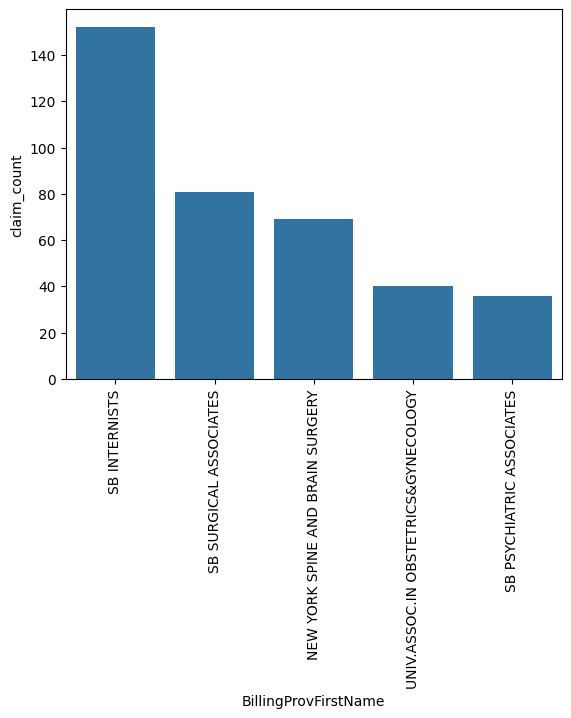

In [138]:
sns.barplot(x='BillingProvFirstName', y='claim_count', data=billing_providers.head(5), order=billing_providers.head(5)['BillingProvFirstName'])
plt.xticks(rotation=90)
plt.savefig('../images/billing_providers_chart.png')
#save chart as image to embed result into markdown
print("Chart saved as billing_providers_chart.png")

Markdown string to embed image onto Markdown cell:



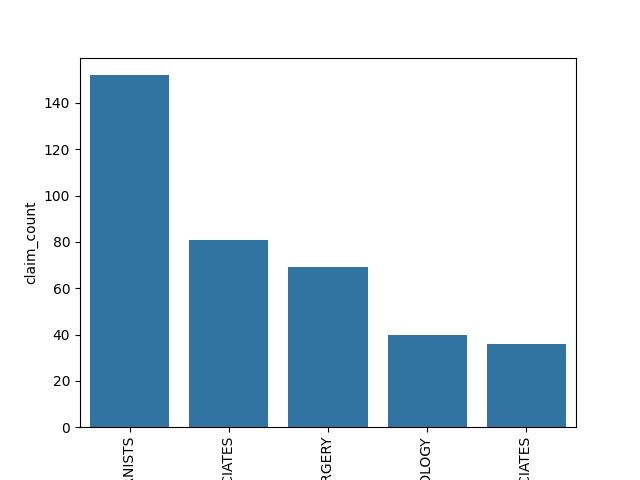

In [139]:

image_path = '../images/billing_providers_chart.png'

with open(image_path, 'rb') as f:
    image_data = f.read()
    encoded_image = base64.b64encode(image_data).decode('utf-8')

markdown_image_string = f"![Billing Providers Chart](data:image/png;base64,{encoded_image})"

print("Markdown string to embed image onto Markdown cell:\n")
print(markdown_image_string)

In [140]:
#PrimaryPayerName - top five primary payers with the most claims
primary_payer = df_header.groupby('PrimaryPayerName').size().reset_index(name='claim_count')
primary_payer = primary_payer.sort_values(by='claim_count', ascending=False)

total_claims = primary_payer['claim_count'].sum()
primary_payer['percentage_of_claims'] = (primary_payer['claim_count'] / total_claims) * 100
print(primary_payer.iloc[0:5])

              PrimaryPayerName  claim_count  percentage_of_claims
17                    MEDICARE          242             62.371134
12             HEALTHFIRST FFS           46             11.855670
9   FIDELIS/BETTER HEALTH PLAN           26              6.701031
14                HIP MEDICAID           17              4.381443
10       HEALTHFIRST CAPITATED           10              2.577320


Chart saved as primary_payer_chart.png


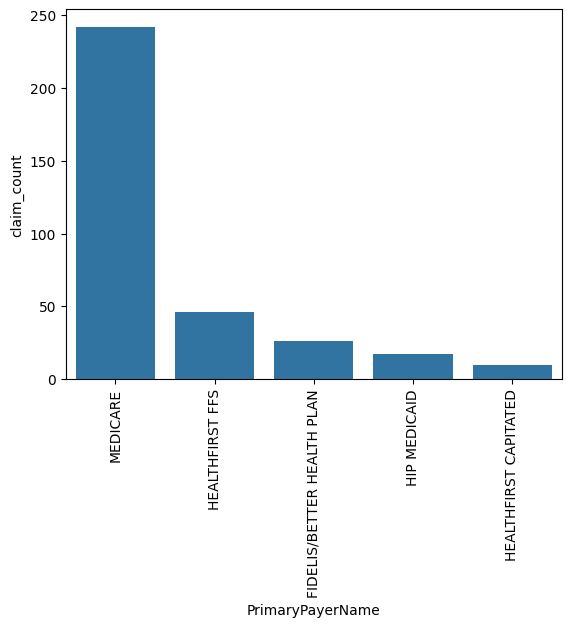

In [141]:
sns.barplot(x='PrimaryPayerName', y='claim_count', data=primary_payer.head(5), order=primary_payer.head(5)['PrimaryPayerName'])
plt.xticks(rotation=90)
plt.savefig('../images/primary_payer_chart.png')
#save chart as image to embed result into markdown
print("Chart saved as primary_payer_chart.png")

Markdown string to embed image onto Markdown cell:



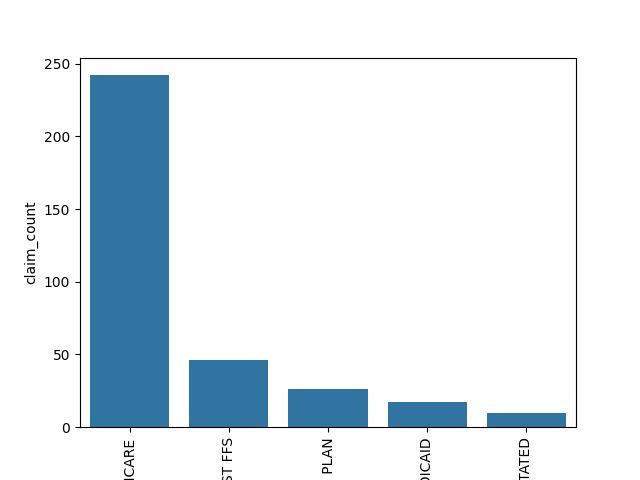

In [142]:
#markdown embedded link
image_path = '../images/primary_payer_chart.png'

with open(image_path, 'rb') as f:
    image_data = f.read()
    encoded_image = base64.b64encode(image_data).decode('utf-8')

markdown_image_string = f"![Primary Payer Chart](data:image/png;base64,{encoded_image})"

print("Markdown string to embed image onto Markdown cell:\n")
print(markdown_image_string)

Pie chart saved as primary_payer_pie_chart.png

Markdown string to embed pie chart onto Markdown cell:



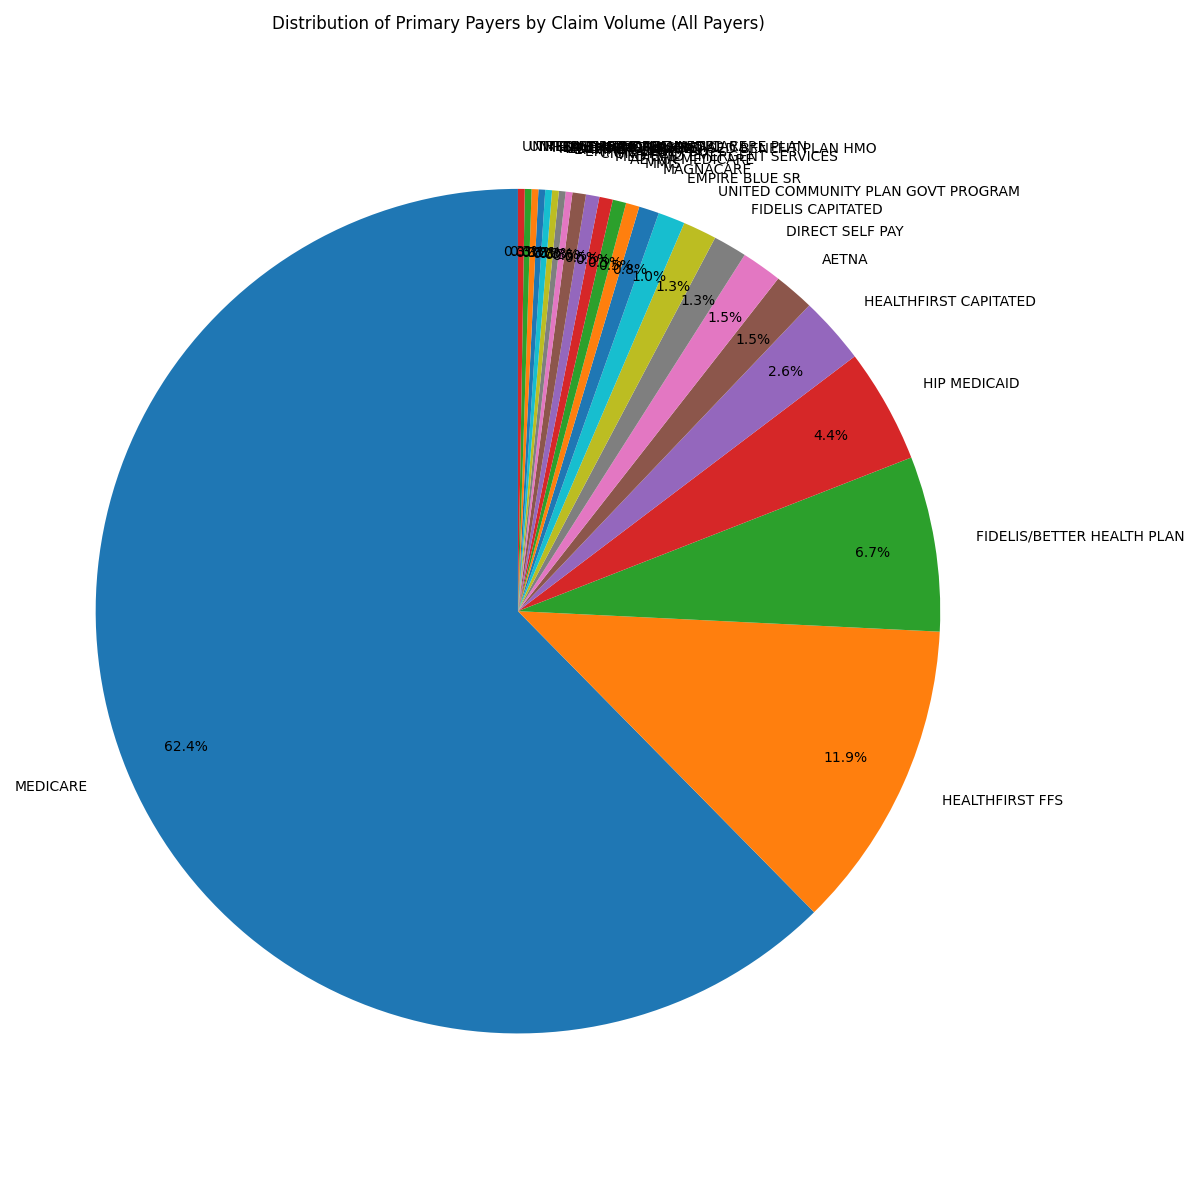

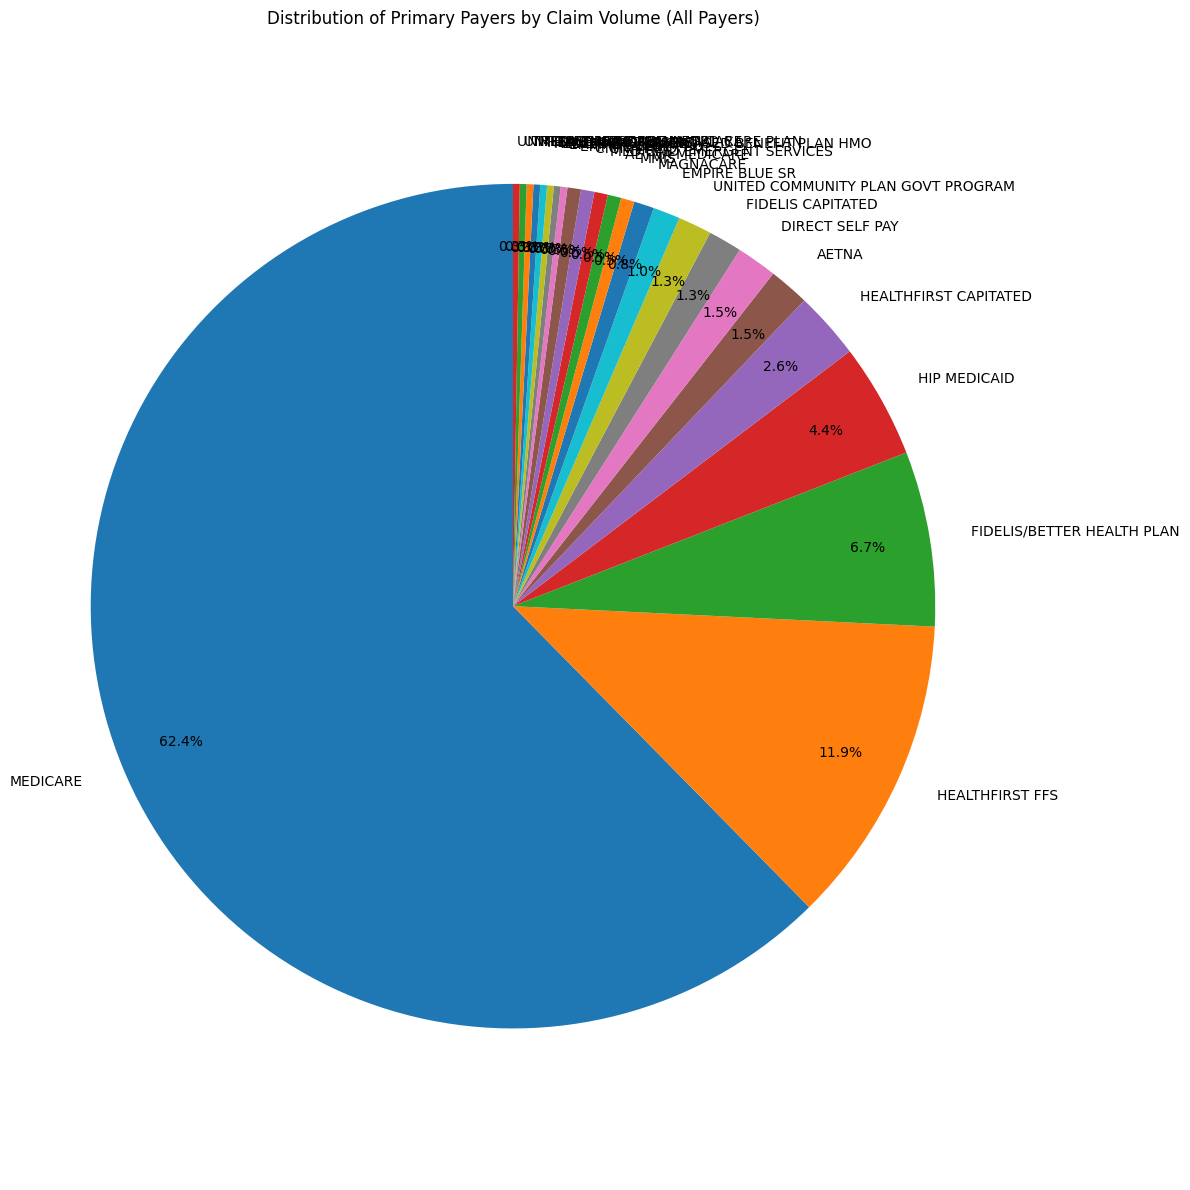

In [143]:

# Create the pie chart
plt.figure(figsize=(12, 12))
plt.pie(primary_payer['claim_count'],
        labels=primary_payer['PrimaryPayerName'],
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85) # Adjust pctdistance to place percentages inside slices

plt.title('Distribution of Primary Payers by Claim Volume (All Payers)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

# Save the chart
plt.savefig('../images/primary_payer_pie_chart.png')
print("Pie chart saved as primary_payer_pie_chart.png")

# Generate markdown string for embedding
with open('../images/primary_payer_pie_chart.png', 'rb') as f:
    image_data = f.read()
    encoded_image = base64.b64encode(image_data).decode('utf-8')

markdown_image_string = f"![Primary Payer Pie Chart](data:image/png;base64,{encoded_image})"

print("\nMarkdown string to embed pie chart onto Markdown cell:\n")
print(markdown_image_string)

     Facility_Location  PlaceOfService  claim_count
3            INPATIENT              21          231
1      DOCTOR'S OFFICE              11          132
4  OUTPATIENT HOSPITAL              22           14
0   AMBULATORY SURGERY              22           10
2            EMERGENCY              23            1


<module 'matplotlib.pyplot' from 'c:\\Users\\ylo03\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

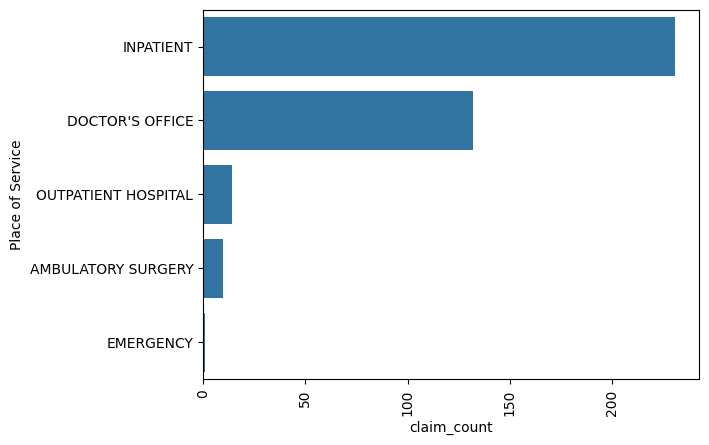

In [144]:

# Place of Service frequency of claims
place_of_service = df_header.groupby(['Facility_Location','PlaceOfService']).size().reset_index(name='claim_count')
place_of_service = place_of_service.sort_values(by='claim_count', ascending=False)
print(place_of_service)

sns.barplot(x='claim_count', y='Facility_Location', data=place_of_service, order=place_of_service['Facility_Location'])
plt.xticks(rotation=90)
plt.ylabel('Place of Service') # Corrected line: use plt.ylabel() to set the y-axis label
plt.savefig('../images/place_of_service_chart.png')
#save chart as image to embed result into markdown
plt

Pie chart saved as place_of_service_pie_chart.png


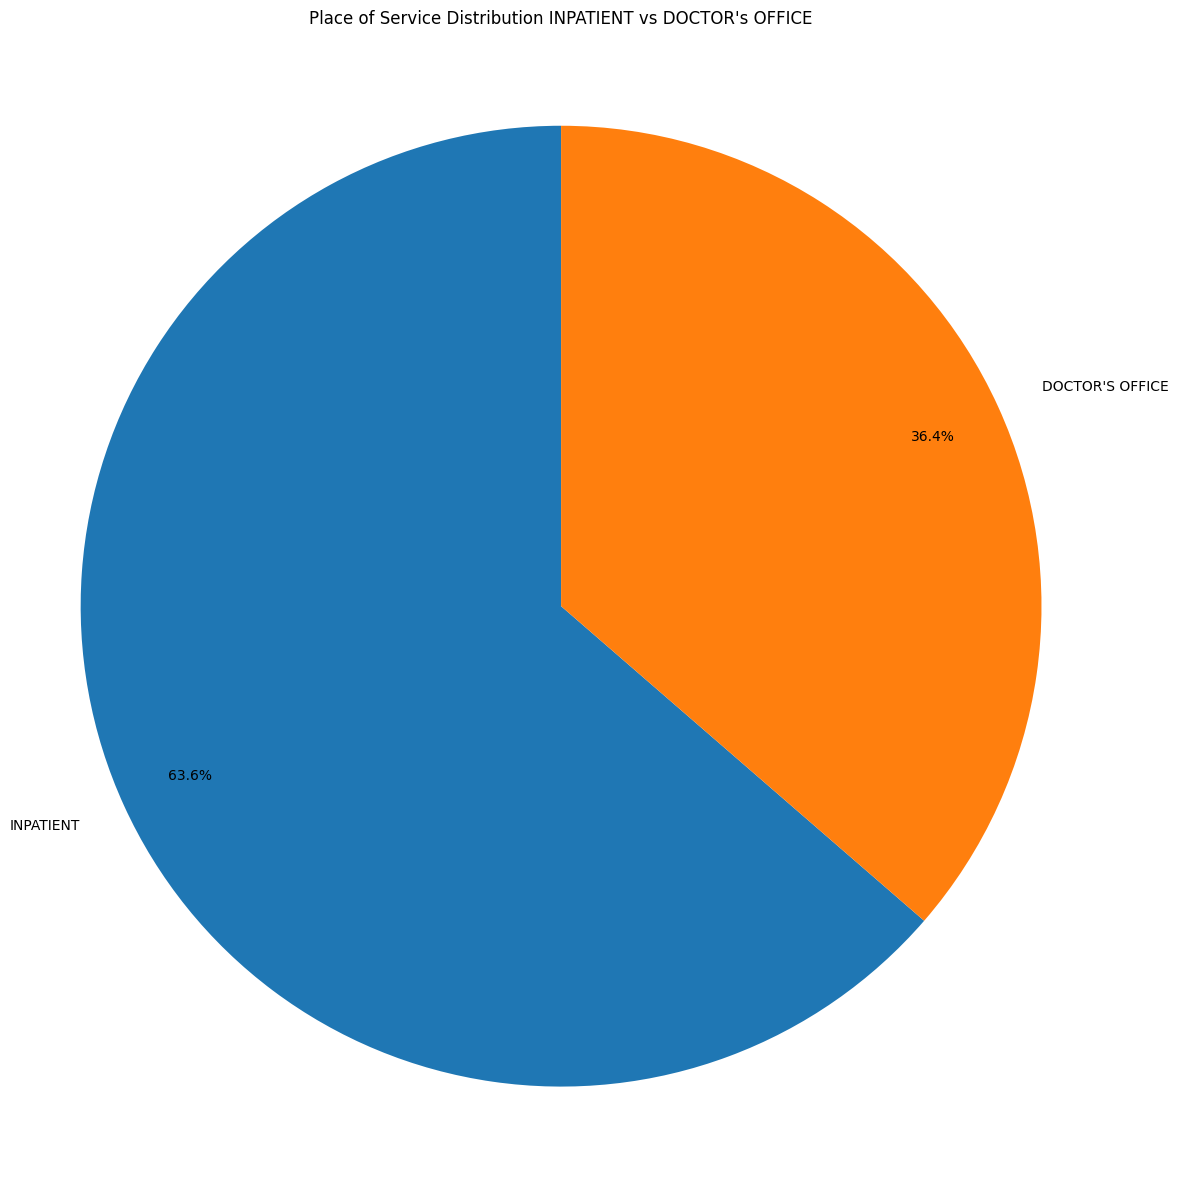

In [145]:
# Place of Service pie chart of INPATIENT vs DOCTOR's OFFICE

plt.figure(figsize=(12, 12))
plt.pie(place_of_service.head(2)['claim_count'],
        labels=place_of_service.head(2)['Facility_Location'],
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85)
plt.title('Place of Service Distribution INPATIENT vs DOCTOR\'s OFFICE')
plt.axis('equal')
plt.tight_layout()

# Save the chart
plt.savefig('../images/inpatient_vs_office_visit_pie_chart.png')
print("Pie chart saved as place_of_service_pie_chart.png")




Markdown string to embed pie chart onto Markdown cell:



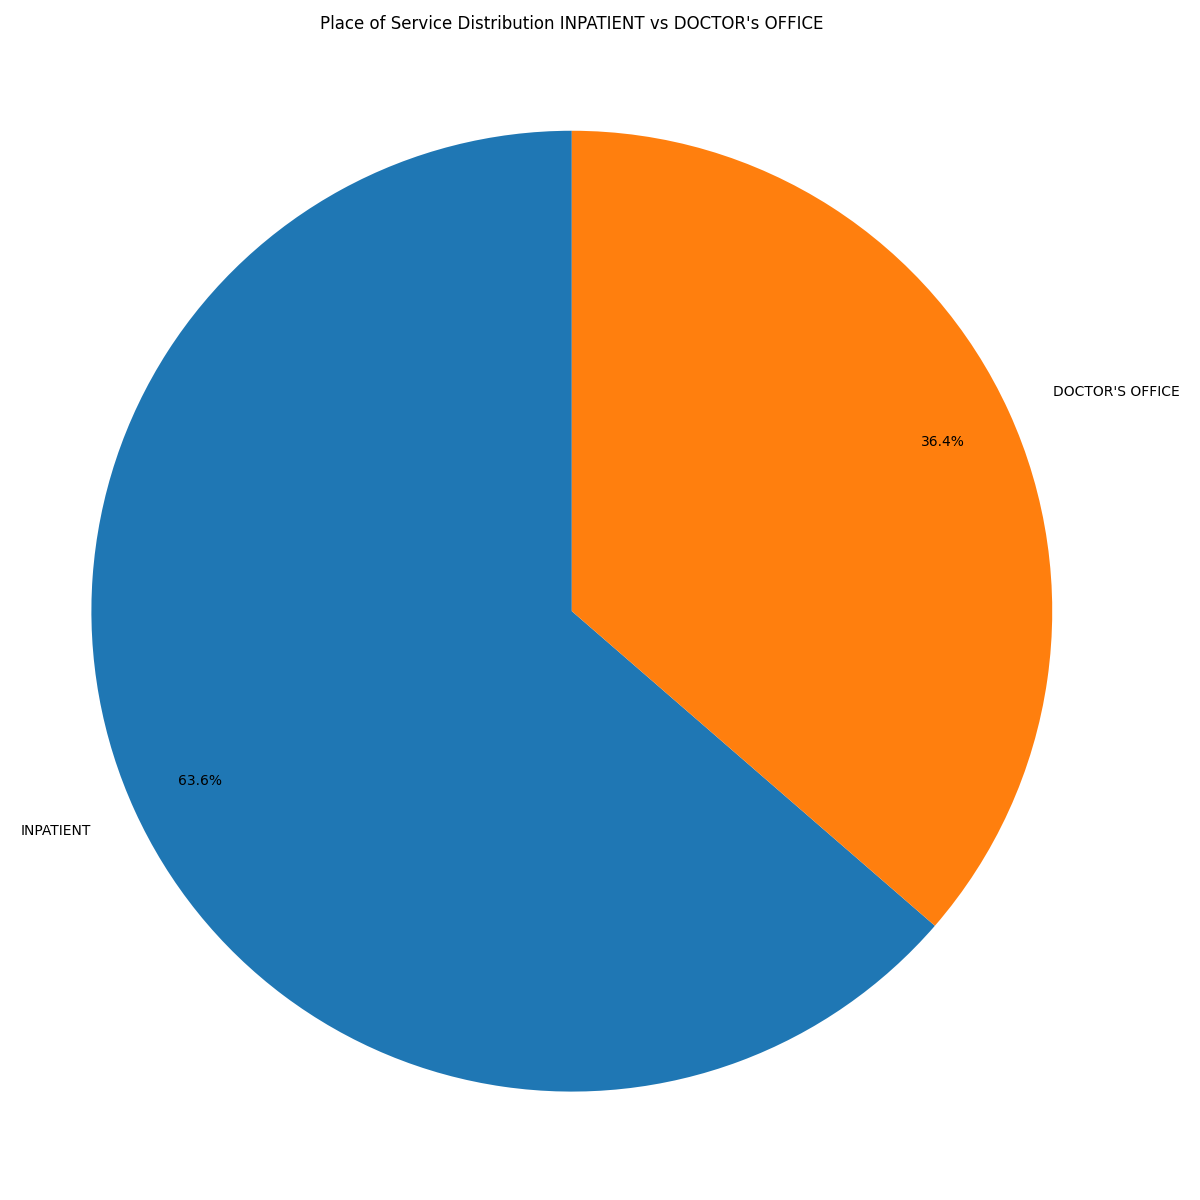

In [146]:
# Generate markdown string for embedding
with open('../images/inpatient_vs_office_visit_pie_chart.png', 'rb') as f:
    image_data = f.read()
    encoded_image = base64.b64encode(image_data).decode('utf-8')

markdown_image_string = f"![INPATIENT vs DOCTORs OFFICE Pie Chart](data:image/png;base64,{encoded_image})"

print("\nMarkdown string to embed pie chart onto Markdown cell:\n")
print(markdown_image_string)

_Loading and validating Line data_
Contains one row per service line (procedures/services):
- `ProspectiveClaimId`: Links to HEADER file
- `LinePos`: Line number on the claim
- `HCPCS`: CPT/HCPCS procedure code
- `Modifier1-4`: Procedure modifiers
- `DxMapDelim`: Shows which diagnosis codes justify this procedure
- `Charges`: Dollar amount billed for this line
- `Units`: Quantity of service

In [147]:
df_line = pd.read_csv('../content/STONYBRK_20240531_LINE.csv')
print(df_line.shape)

(520, 28)


In [148]:
print(df_line.head())

   ClientId  ProspectiveClaimId  LinePos  RevCode  HCPCS Modifier1 Modifier2  \
0        49            35216986        1      NaN  99291        GC        25   
1        49            35235657        1      NaN  99291        GC        25   
2        49            35244774        1      NaN  99291        GC        25   
3        49            35249003        1      NaN  99291        GC       NaN   
4        49            35249014        1      NaN  99291        GC       NaN   

   Modifier3  Modifier4            DxMapDelim  ...  PlaceOfService  NDC  \
0        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   
1        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   
2        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   
3        NaN        NaN           1,2,3,4,5,6  ...              21  NaN   
4        NaN        NaN           1,2,3,4,5,6  ...              21  NaN   

   NDCUnits  NDCRx NDCUnitQualifier RenderingProvNPI  CoderId  CodeN

In [149]:
print(df_line.dtypes)

ClientId                 int64
ProspectiveClaimId       int64
LinePos                  int64
RevCode                float64
HCPCS                   object
Modifier1               object
Modifier2               object
Modifier3              float64
Modifier4              float64
DxMapDelim              object
DxMap1                   int64
DxMap2                 float64
DxMap3                 float64
DxMap4                 float64
ServiceDate             object
ServiceThruDate         object
Units                    int64
Charges                  int64
PlaceOfService           int64
NDC                    float64
NDCUnits               float64
NDCRx                  float64
NDCUnitQualifier       float64
RenderingProvNPI       float64
CoderId                  int64
CodeName                object
ClientProcedureCode     object
ClientProcedureName     object
dtype: object


In [150]:
# Calculate the number of service lines per claim
service_lines_per_claim =df_line
service_lines_per_claim = service_lines_per_claim.groupby('ProspectiveClaimId').size().reset_index(name='service_line_count')
service_lines_per_claim = service_lines_per_claim.sort_values(by='service_line_count', ascending=False)
average_service_lines_per_claim = service_lines_per_claim['service_line_count'].mean()
print(f"Average number of service lines per claim: {average_service_lines_per_claim:.2f}")


Average number of service lines per claim: 1.34


In [151]:
print(df_line.isnull().sum())

ClientId                 0
ProspectiveClaimId       0
LinePos                  0
RevCode                520
HCPCS                    0
Modifier1              273
Modifier2              482
Modifier3              520
Modifier4              520
DxMapDelim               0
DxMap1                   0
DxMap2                 180
DxMap3                 288
DxMap4                 353
ServiceDate              0
ServiceThruDate          0
Units                    0
Charges                  0
PlaceOfService           0
NDC                    520
NDCUnits               520
NDCRx                  520
NDCUnitQualifier       520
RenderingProvNPI       520
CoderId                  0
CodeName                 0
ClientProcedureCode      0
ClientProcedureName      0
dtype: int64


In [152]:

#map HCPCS code to HCPCS name using https://www.aapc.com/codes/hcpcs-codes-range/?srsltid=AfmBOoqp8LZMSkScyuIkw1THvsryfq_PvVil5j34qvR5rm83_mie-Pmr

hcpcs_pre = df_line
hcpcs_pre
hcpcs_freq = hcpcs_pre.groupby(['HCPCS','ClientProcedureName']).size().reset_index(name='claim_count')
hcpcs_freq = hcpcs_freq.sort_values(by='claim_count', ascending=False)

hcpcs_code_mapping={
 '99291':'Critical Care Services (99291)',
 '99233':'Subsequent Hospital Inpatient or Observation Care (99233)',
 '99213':'Established Patient (99213)',
 '99223':'New or Established Patient (99223)',
 '99222':'New or Established Patient (99222)',
 '99232':'Subsequent Hospital Inpatient or Observation Care (99232)',
 '90833':'Psychotherapy Services and Procedures (90833)',
 '92557':'Audiologic Function Tests (92557)',
 '99204':'New Patient (99204)',
 '99214':'Established Patient (99214)',
}

total_claims = hcpcs_freq['claim_count'].sum()
hcpcs_freq['percentage_of_claims'] = (hcpcs_freq['claim_count'] / total_claims) * 100
hcpcs_freq['HCPCSName'] = hcpcs_freq['HCPCS'].map(hcpcs_code_mapping)

print(hcpcs_freq.head(10))


     HCPCS                                ClientProcedureName  claim_count  \
104  99291                  CRITICAL CARE, INITIAL FIRST HOUR           68   
89   99222   INITIAL HOSPITAL CARE PER DAY FOR THE E&M OF ...           30   
96   99233  SUBSEQ. HOSP CARE DETAILED INTERVAL HX,EX,HIGH...           27   
91   99223  INITIAL  HOSPITAL CARE PER DAY,FOR THE E&M OF ...           24   
81   99213  OFFICE/OUTPATIENT VISIT,ESTABL.PT,EXPANDED HX,...           19   
98   99233  SUBSEQUENT HOSP. CARE,PER DAY,FOR THE E&M OF A...           18   
44   90833  PSYCHOTHERAPY WITH AN E&M SERVICE,30 MINS,PATI...           16   
80   99213  OFFICE/OUTPATIENT VISIT FOR  E&M OF ESTAB PATI...           15   
48   92557  COMPREHENSIVE AUDIOMETRY THRESHOLD EVALUATION;...           14   
109  99442      TELEPHONE SERVICES MD/NPP;11-20 MINUTES......           13   

     percentage_of_claims                                          HCPCSName  
104             13.076923                     Critical Care Se

C:\Users\ylo03\AppData\Local\Temp\ipykernel_32620\1138334491.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


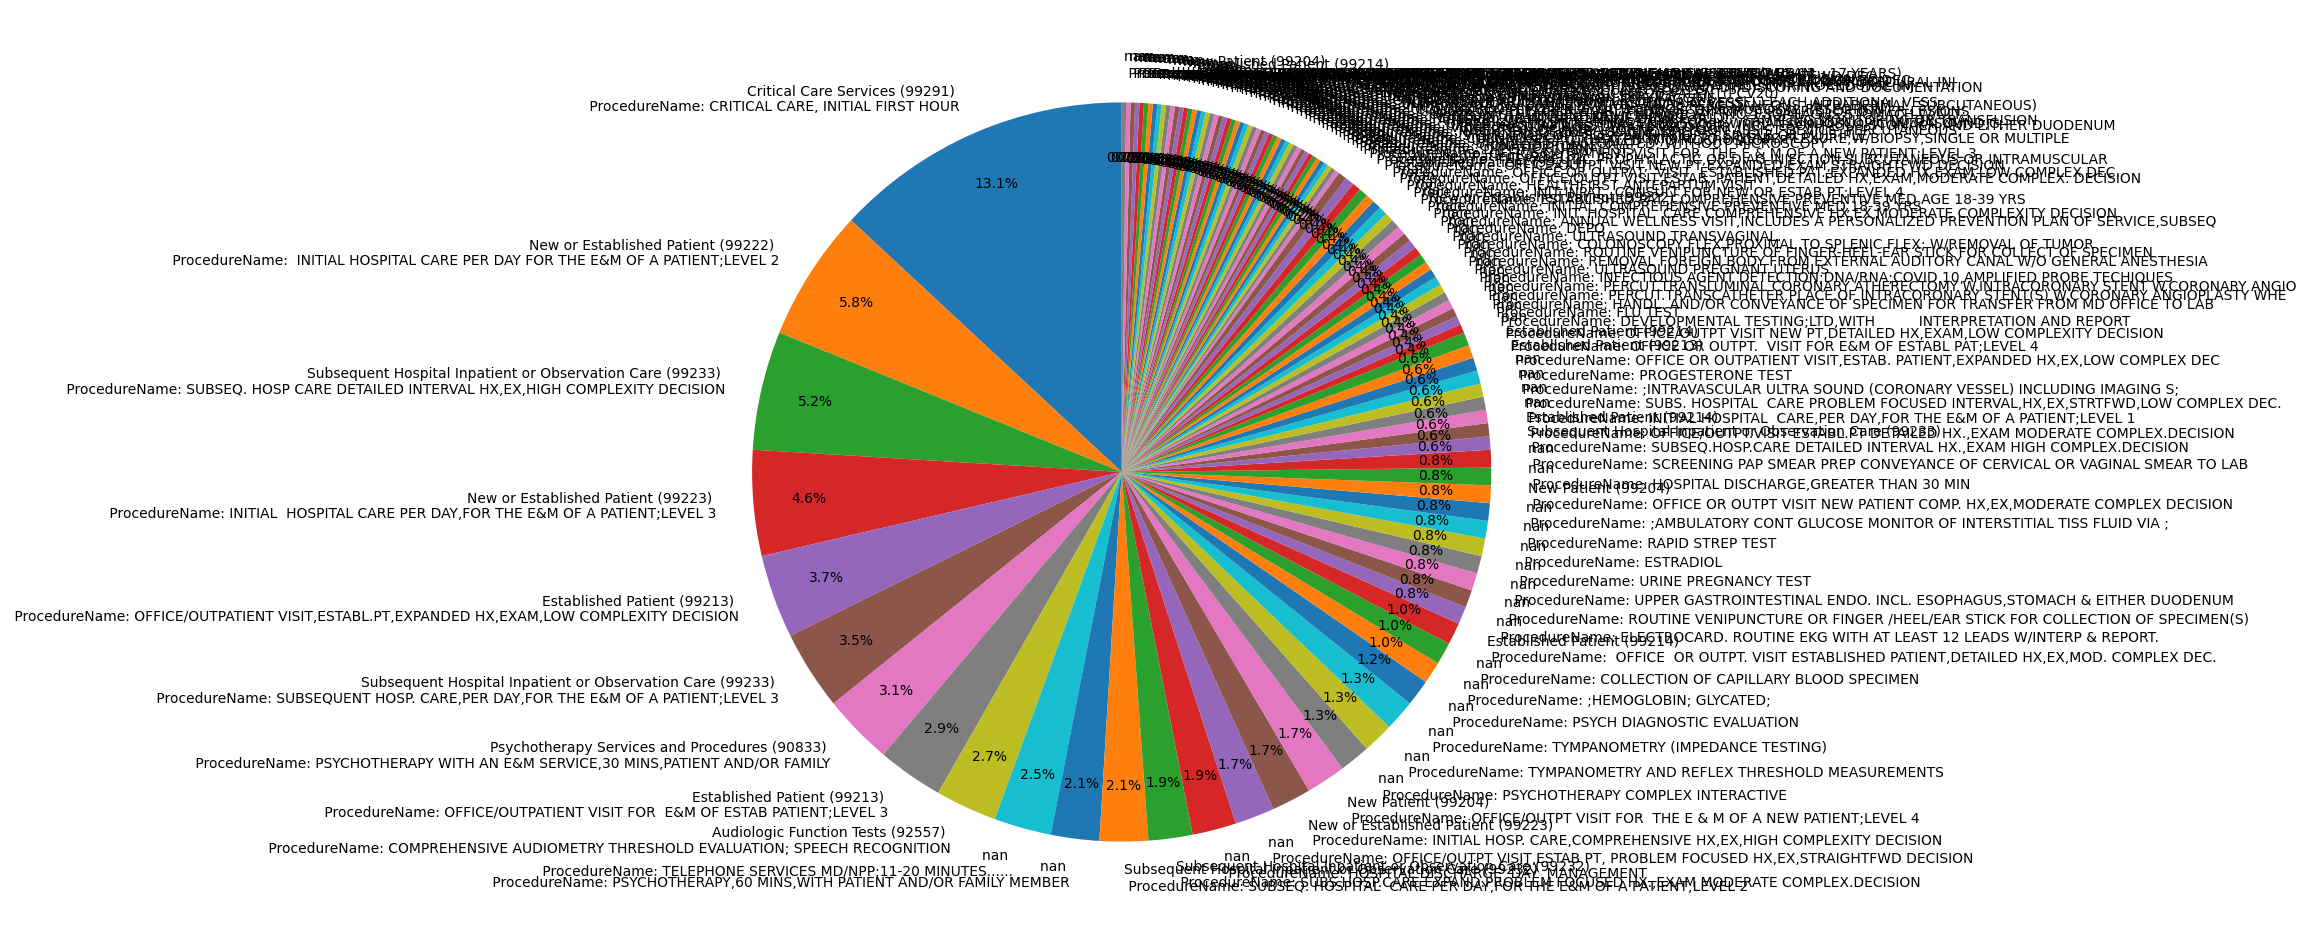

Chart saved as hcpcs_pie_chart.png


In [153]:



# Create custom labels including HCPCSName and ClientProcedureCode
pie_labels = [
    f"{row['HCPCSName']} \n ProcedureName: {row['ClientProcedureName']}"
    for index, row in hcpcs_freq.iterrows()
]
pie_labels
plt.figure(figsize=(12, 12))
plt.pie(hcpcs_freq['claim_count'],
        labels=pie_labels,
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85)
plt.tight_layout()
plt.savefig('../images/hcpcs_pie_chart.png')
plt.show()
#save chart as image to embed result into markdown
print("Chart saved as hcpcs_pie_chart.png")


Markdown string to embed pie chart onto Markdown cell:



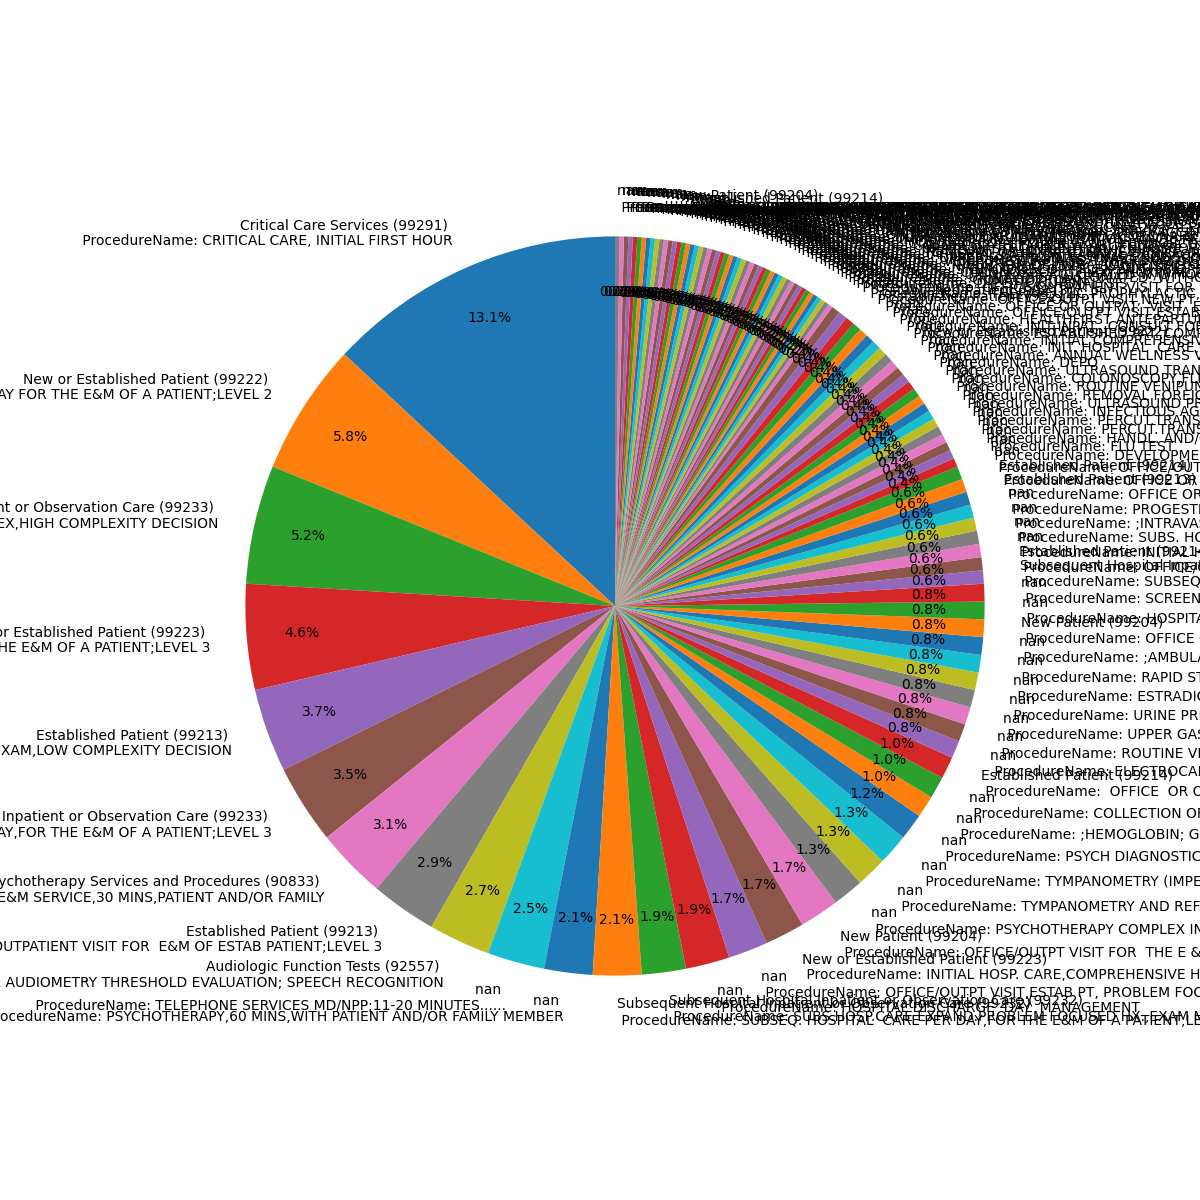

In [154]:
# Generate markdown string for embedding
with open('../images/hcpcs_pie_chart.png', 'rb') as f:
    image_data = f.read()
    encoded_image = base64.b64encode(image_data).decode('utf-8')

markdown_image_string = f"![HCPCS Pie Chart](data:image/png;base64,{encoded_image})"

print("\nMarkdown string to embed pie chart onto Markdown cell:\n")
print(markdown_image_string)

Chart saved as hcpcs_chart.png


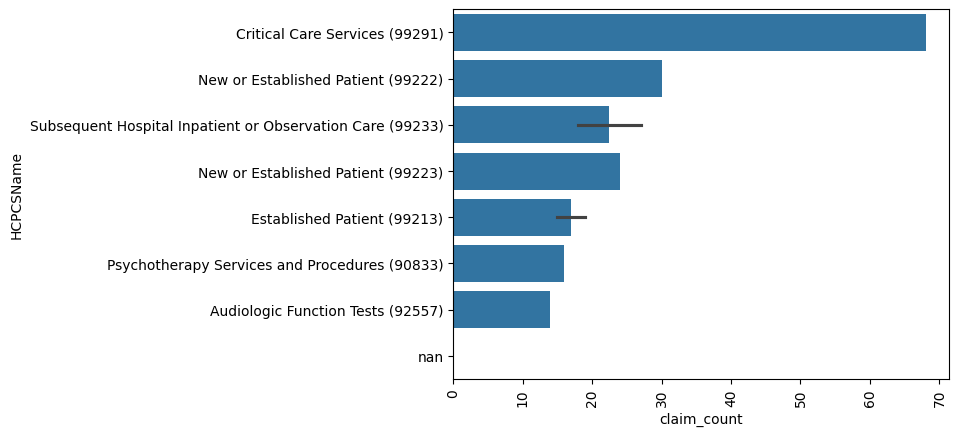

In [155]:
sns.barplot(x='claim_count', y='HCPCSName', data=hcpcs_freq.head(10), order=hcpcs_freq.head(10)['HCPCSName'])
plt.xticks(rotation=90)
plt.savefig('../images/hcpcs_chart.png')
#save chart as image to embed result into markdown
print("Chart saved as hcpcs_chart.png")



Markdown string to embed bar chart onto Markdown cell:



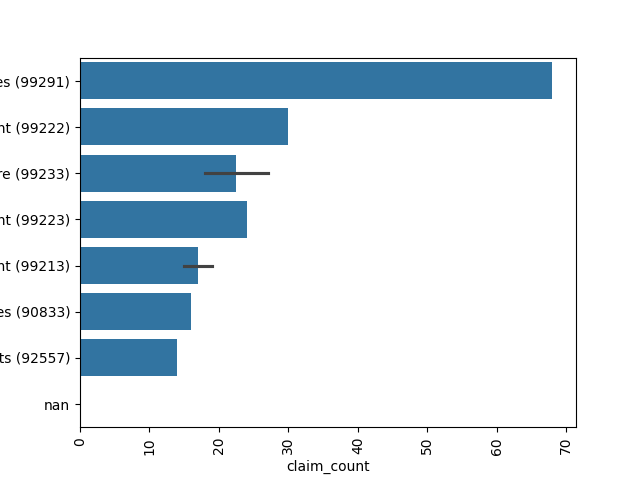

In [156]:
# Generate markdown string for embedding
with open('../images/hcpcs_chart.png', 'rb') as f:
    image_data = f.read()
    encoded_image = base64.b64encode(image_data).decode('utf-8')

markdown_image_string = f"![HCPCS Bar Chart](data:image/png;base64,{encoded_image})"

print("\nMarkdown string to embed bar chart onto Markdown cell:\n")
print(markdown_image_string)

_Loading and validating Code data_
- `ProspectiveClaimId`: Links to HEADER file
- `CodePos`: Position/order of diagnosis on claim
- `CodeValue`: ICD-10 diagnosis code
- `CodeQualifier`: Code type (ABF, ABK, etc.)

In [157]:
df_code  = pd.read_csv('../content/STONYBRK_20240531_CODE.csv')
print(df_code.shape)

(1536, 9)


In [158]:
print(df_code.head())

   ClientId  ProspectiveClaimId CodeQualifier  CodePos CodeValue  \
0        49            36752505           ABF        3     G93.6   
1        49            36819490           ABF        4     N17.9   
2        49            35352862           ABF        2     G06.1   
3        49            35244774           ABF       10     G90.8   
4        49            36745815           ABK        1   I77.819   

   CodeFromDate  CodeToDate  CodeAmnt  POAInd  
0           NaN         NaN       NaN     NaN  
1           NaN         NaN       NaN     NaN  
2           NaN         NaN       NaN     NaN  
3           NaN         NaN       NaN     NaN  
4           NaN         NaN       NaN     NaN  


In [159]:
print(df_code.dtypes)

ClientId                int64
ProspectiveClaimId      int64
CodeQualifier          object
CodePos                 int64
CodeValue              object
CodeFromDate          float64
CodeToDate            float64
CodeAmnt              float64
POAInd                float64
dtype: object


In [160]:
print(df_code.isnull().sum())

ClientId                 0
ProspectiveClaimId       0
CodeQualifier            0
CodePos                  0
CodeValue                0
CodeFromDate          1536
CodeToDate            1536
CodeAmnt              1536
POAInd                1536
dtype: int64


In [161]:
diagnosis_per_claim = df_code.groupby('ProspectiveClaimId').size().reset_index(name='claim_count')
average_diagnosis_codes_per_claim = diagnosis_per_claim['claim_count'].mean()
print(f"Average number of diagnosis codes per claim: {average_diagnosis_codes_per_claim:.2f}")

Average number of diagnosis codes per claim: 3.96


In [162]:
# frequency of Codes
code_frequency = df_code.groupby('CodeValue').size().reset_index(name='code_count')
# Create a dictionary to map CodeValue to CodeName
# Actual ICD-10 codes and their descriptive names derived from https://www.icd10data.com/ICD10CM/Codes
code_name_mapping = {
    'J96.01': 'Acute respiratory failure with hypoxia (J96.01)',
    'E78.5': 'Hyperlipidemia, unspecified (E78.5)',
    'I10': 'Essential (primary) hypertension (I10)',
    'G93.5': 'Compression of brain (G93.5)',
    'D64.9': 'Anemia, unspecified (D64.9)',
    'I25.10': 'Atherosclerotic heart disease of native coronary artery without angina pectoris (I25.10)',
    'I61.9': 'Nontraumatic intracerebral hemorrhage, unspecified (I61.9)',
    'I48.91': 'Unspecified atrial fibrillation (I48.91)',
    'I60.8': 'Other nontraumatic intracranial hemorrhage (I60.8)',
    'I50.9': 'Heart failure, unspecified (I50.9)',
}

# Map the CodeValue to CodeName
code_frequency['CodeName'] = code_frequency['CodeValue'].map(code_name_mapping)
code_frequency = code_frequency.sort_values(by='code_count', ascending=False)
print(code_frequency.head(10))

# Save the chart
image_path = '../images/code_pie_chart.png'
plt.savefig(image_path)
print("Pie chart saved as code_pie_chart.png")

    CodeValue  code_count                                           CodeName
242    J96.01          62    Acute respiratory failure with hypoxia (J96.01)
70      E78.5          49                Hyperlipidemia, unspecified (E78.5)
161       I10          49             Essential (primary) hypertension (I10)
143     G93.5          34                       Compression of brain (G93.5)
36      D64.9          29                        Anemia, unspecified (D64.9)
165    I25.10          27  Atherosclerotic heart disease of native corona...
194     I61.9          26  Nontraumatic intracerebral hemorrhage, unspeci...
179    I48.91          24           Unspecified atrial fibrillation (I48.91)
191     I60.8          24  Other nontraumatic intracranial hemorrhage (I6...
190     I50.9          22                 Heart failure, unspecified (I50.9)
Pie chart saved as code_pie_chart.png


<Figure size 640x480 with 0 Axes>

Pie chart saved as code_pie_chart.png


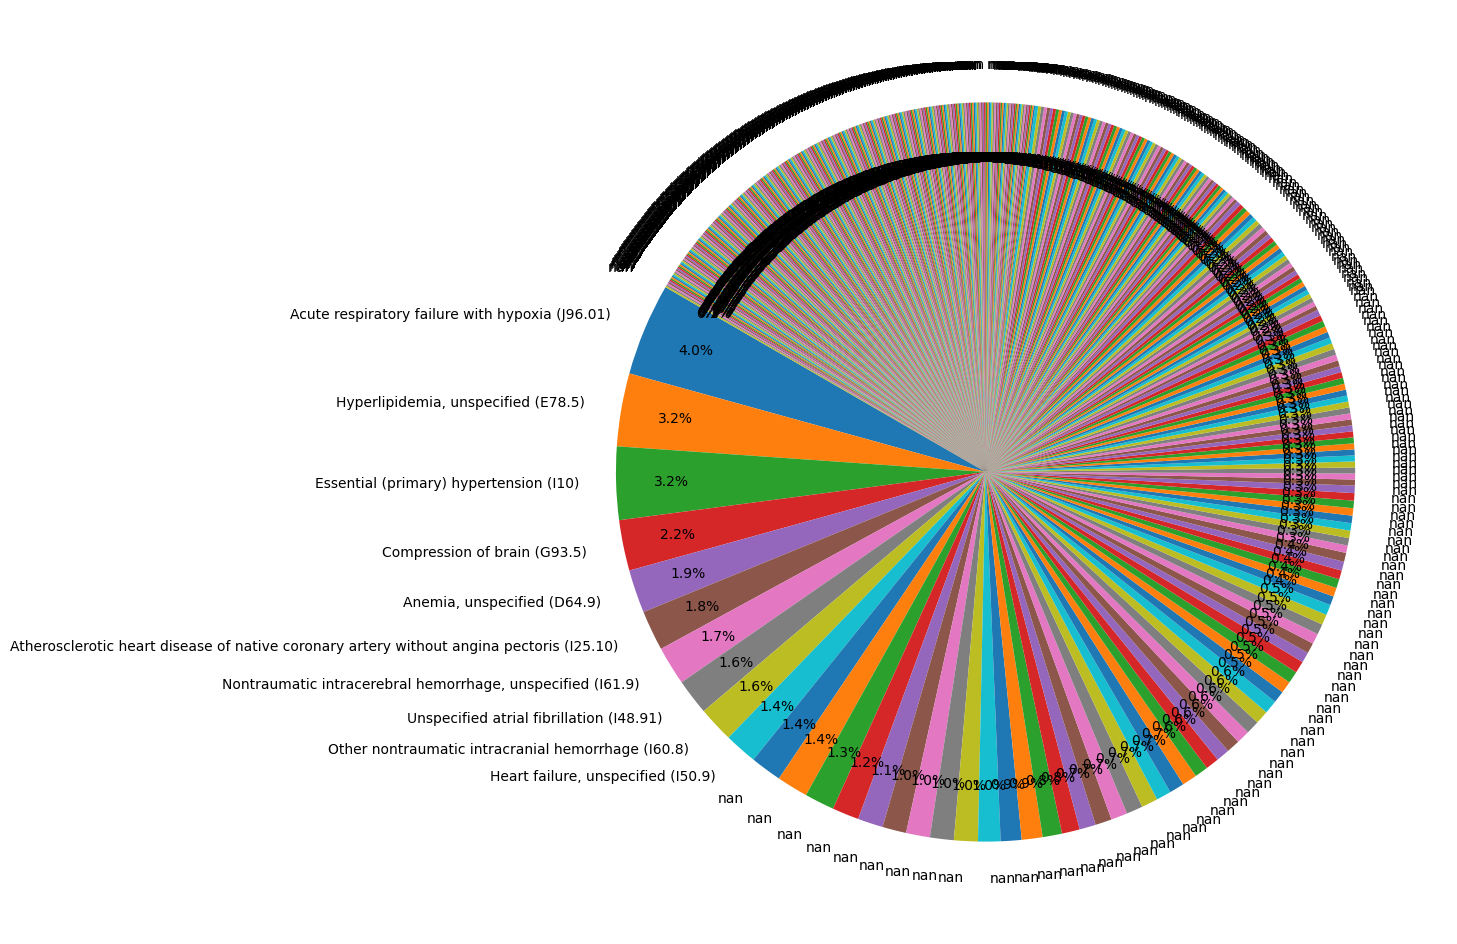

In [163]:
# pie chart of code values by percentages
plt.figure(figsize=(12, 12))
plt.pie(code_frequency['code_count'],
        labels=code_frequency['CodeName'],
        autopct='%1.1f%%',
        startangle=150,
        pctdistance=0.85) # Adjust pctdistance to place percentages inside slices
# Save the chart
image_path = '../images/code_pie_chart.png'
plt.savefig(image_path)
print("Pie chart saved as code_pie_chart.png")


Markdown string to embed pie chart onto Markdown cell:



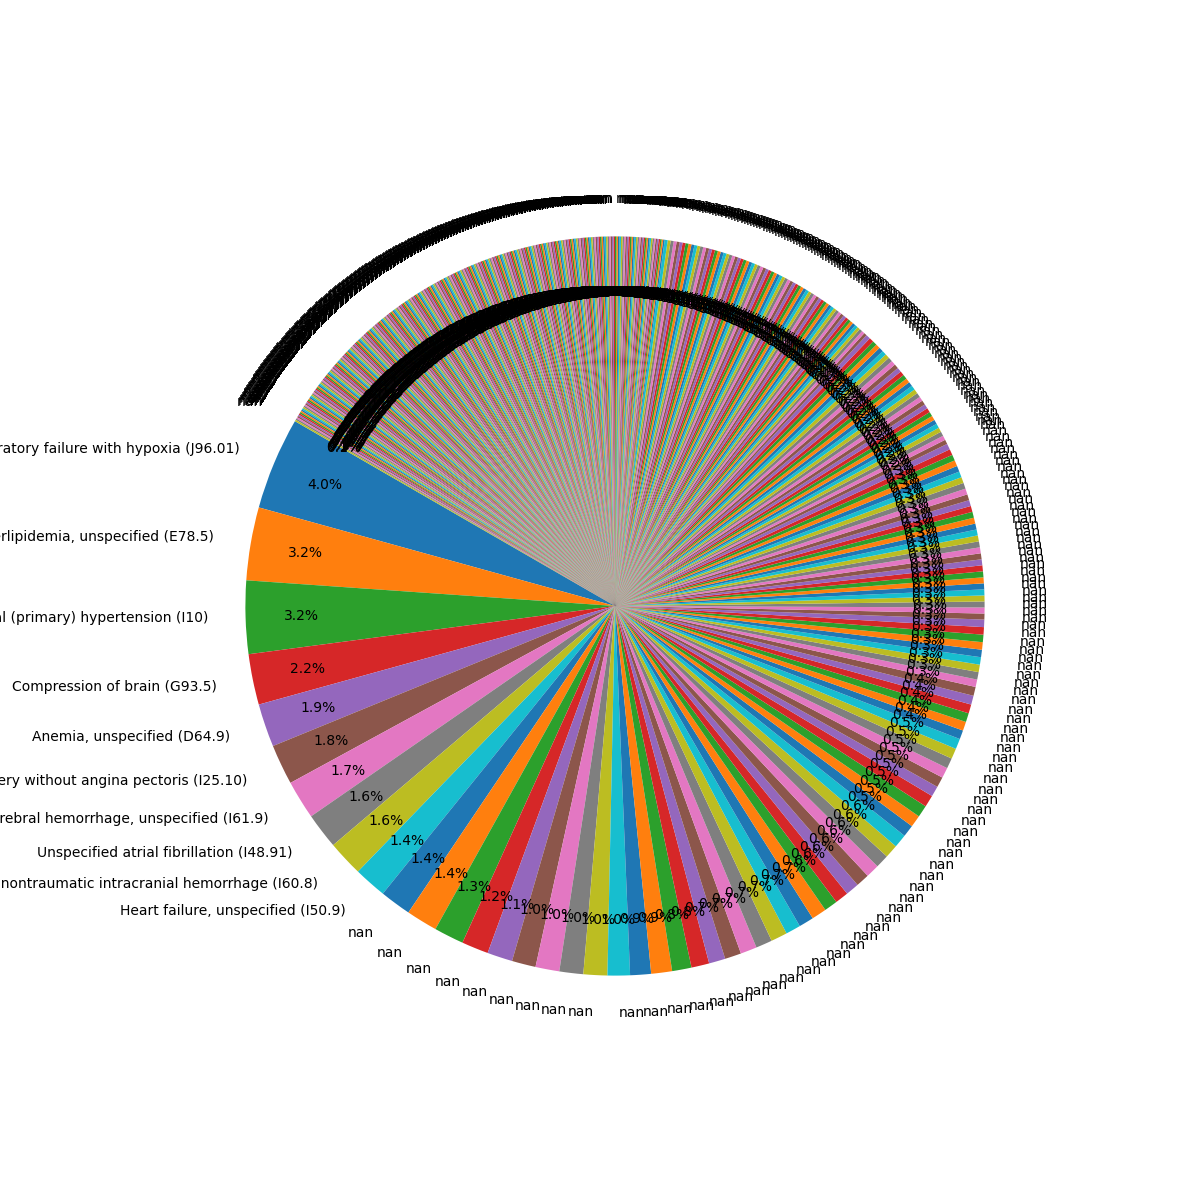

In [164]:


# Generate markdown string for embedding

with open(image_path, 'rb') as f:
    image_data = f.read()
    encoded_image = base64.b64encode(image_data).decode('utf-8')

markdown_image_string = f"![Code Diagnosis Pie Chart](data:image/png;base64,{encoded_image})"

print("\nMarkdown string to embed pie chart onto Markdown cell:\n")
print(markdown_image_string)

*3.Document observrations about dataset*
   - How many unique claims are in the dataset?
   - What is the date range of the claims?
   - How many service lines are there on average per claim?
   - How many diagnosis codes are there on average per claim?

*Claims Data Observations*
   - **_How many unique claims are in the dataset?_**
   
      According to the data found in [df_header unique claims](https://colab.research.google.com/drive/1icj8OZbOBw5vzR8iNJG8oOQLReIV12na#scrollTo=Fg5D4iuw5ue1&line=1&uniqifier=1), there are 388 unique claims in our HEADER csv file.
   - _What is the date range of the claims?_
   **bold text**
      Referrencing the results from
      [df_header date ranges](https://colab.research.google.com/drive/1icj8OZbOBw5vzR8iNJG8oOQLReIV12na#scrollTo=HHhJSF_ASfKO&line=1&uniqifier=1), the claims dates range from service from date of September 25th, 2023 to May 29th, 2024.

   - **_How many service lines are there on average per claim?_**
       Upon reviewing our results from [df_header average service line per claim](https://colab.research.google.com/drive/1icj8OZbOBw5vzR8iNJG8oOQLReIV12na#scrollTo=_jyQ2KOK8PbL&line=5&uniqifier=1)
      ,there is an average of 1.34 service line for each header claim.

   - **_How many diagnosis codes are there on average per claim?_**
      Examining the product from [df_header average diagnosis code per claim](https://colab.research.google.com/drive/1icj8OZbOBw5vzR8iNJG8oOQLReIV12na#scrollTo=NEX1kcHI6lBx&line=3&uniqifier=1),
      there is an average of ~4 diagnosis code per header claim.

### Part 2: Relational Data Analysis
Answer the following questions using pandas operations (merge, groupby, value_counts, etc.):

**Question 1: Provider Analysis**
- Who are the top 5 billing providers by number of claims?
- Display: Provider name, NPI, and claim count
  Referencing the data from [biling providers](https://colab.research.google.com/drive/1icj8OZbOBw5vzR8iNJG8oOQLReIV12na#scrollTo=3keWUhO33Ek-&line=1&uniqifier=1), are the following:
  ```
        |BillingProviderNPI  |claim_count|
    5   |       1821035601   |       152 |
    0   |       1063468536   |        81 |
    2   |       1154376309   |        69 |
    4   |       1538114723   |        40 |
    3   |       1437105905   |        36 |
    ```
- Create a simple bar chart showing the top 5 providers
  Please reference Chart display [billing provider chart](https://colab.research.google.com/drive/1icj8OZbOBw5vzR8iNJG8oOQLReIV12na#scrollTo=eYT1QIev9z-m&line=1&uniqifier=1) using seaborn and matplotlib
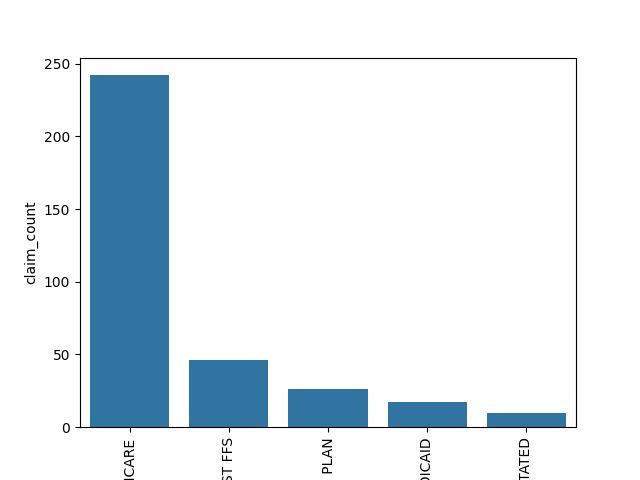


**Question 2: Payer Mix Analysis**
- What are the top 5 primary payers by claim volume?
- Calculate the percentage of total claims for each payer


  The [Top 5 Primary Payers anaysis](https://colab.research.google.com/drive/1icj8OZbOBw5vzR8iNJG8oOQLReIV12na#scrollTo=c0J0tt0-GmS-&line=6&uniqifier=1)
  indicates Medicare as top primary payer, covering 62.4% of claims.
```
      |            PrimaryPayerName | claim_count | percentage_of_claims |
  17  |                  MEDICARE   |       242   |          62.371134   |
  12  |           HEALTHFIRST FFS   |        46   |          11.855670   |
  9   |FIDELIS/BETTER HEALTH PLAN   |        26   |           6.701031   |
  14  |              HIP MEDICAID   |        17   |           4.381443   |
  10  |     HEALTHFIRST CAPITATED   |        10   |           2.577320   |
```
- Create a bar chart or pie chart showing payer distribution

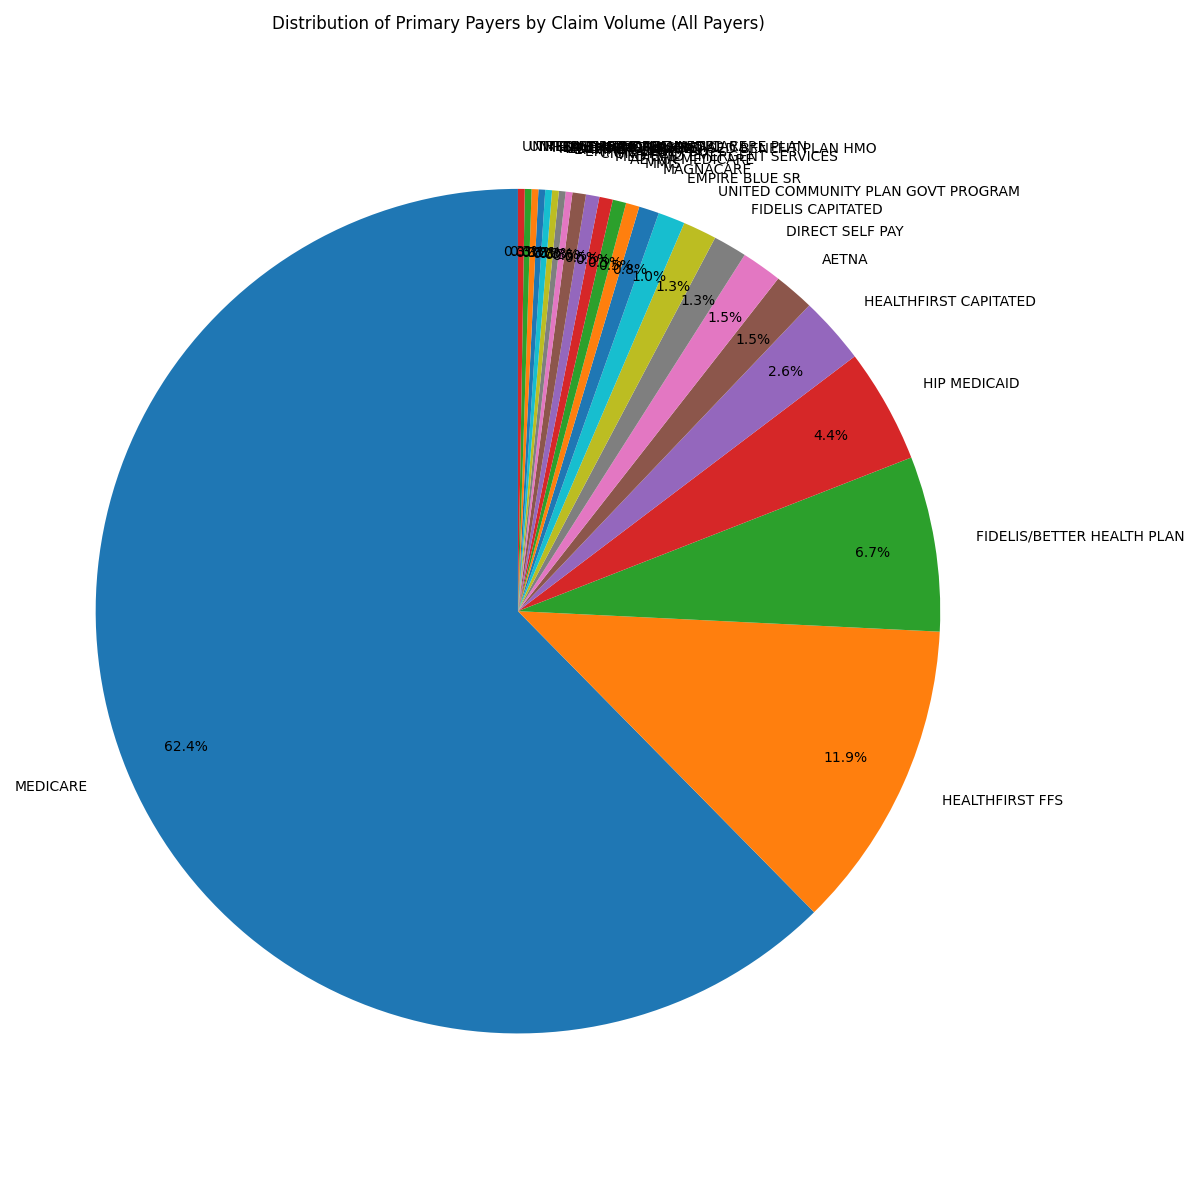


**Question 3: Common Diagnoses**
- What are the 10 most frequently appearing diagnosis codes (CodeValue)?
- Display: ICD-10 code and frequency count
  The most frequent ICD-10 Code is Acute respiratory failure with hypoxia (J96.01) accounting for 4% of the total claims [Chart of most fequent ICD-10 Code](https://colab.research.google.com/drive/1icj8OZbOBw5vzR8iNJG8oOQLReIV12na#scrollTo=2eQNdFrBR7J1&line=3&uniqifier=1)
- Note: meaing of codes are retrieved online from (icd10data.com/search)


  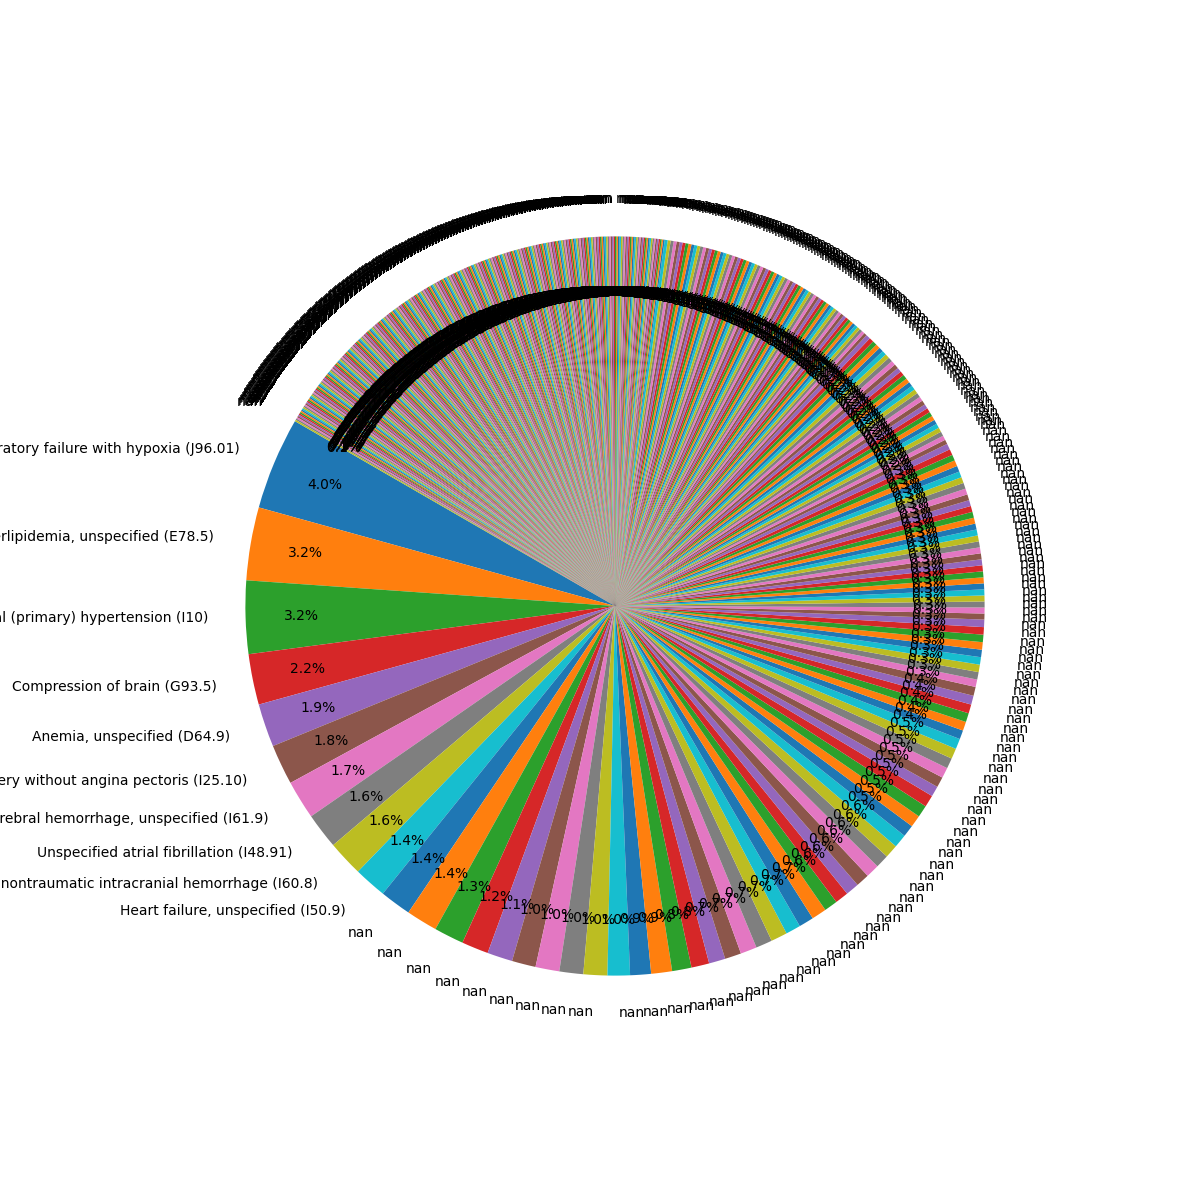




**Question 4: Common Procedures**
- What are the 10 most frequently billed procedure codes (HCPCS)?
- Display: HCPCS code, description (if available in data), and frequency

  The most most claims are from Critical Care () accounting for 13.1% of all claims

  [HCPCS Frequency Data](https://colab.research.google.com/drive/1icj8OZbOBw5vzR8iNJG8oOQLReIV12na#scrollTo=tIpo8xdByYER&line=8&uniqifier=1)
```
    |HCPCS  |claim_count  |percentage_of_claims|  HCPCSName                                                |
81  |99291  |        68   |         13.076923  |                           Critical Care Services (99291)  |
76  |99233  |        48   |          9.230769  |Subsequent Hospital Inpatient or Observation Care (99233)  |
68  |99213  |        39   |          7.500000  |                              Established Patient (99213)  |
73  |99223  |        33   |          6.346154  |                       New or Established Patient (99223)  |
72  |99222  |        32   |          6.153846  |                       New or Established Patient (99222)  |
75  |99232  |        21   |          4.038462  |Subsequent Hospital Inpatient or Observation Care (99232)  |
40  |90833  |        16   |          3.076923  |            Psychotherapy Services and Procedures (90833)  |
44  |92557  |        14   |          2.692308  |                        Audiologic Function Tests (92557)  |
64  |99204  |        14   |          2.692308  |                                      New Patient (99204)  |
69  |99214  |        14   |          2.692308  |                              Established Patient (99214)  |
```

- Create a bar chart showing the top 10 procedures

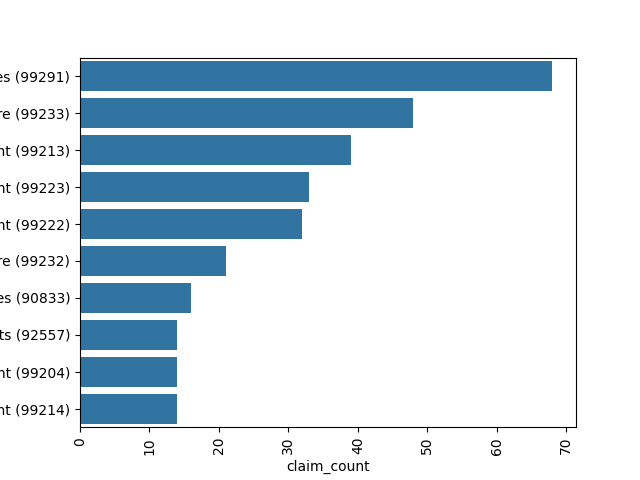

- Pie chart showing all procedures

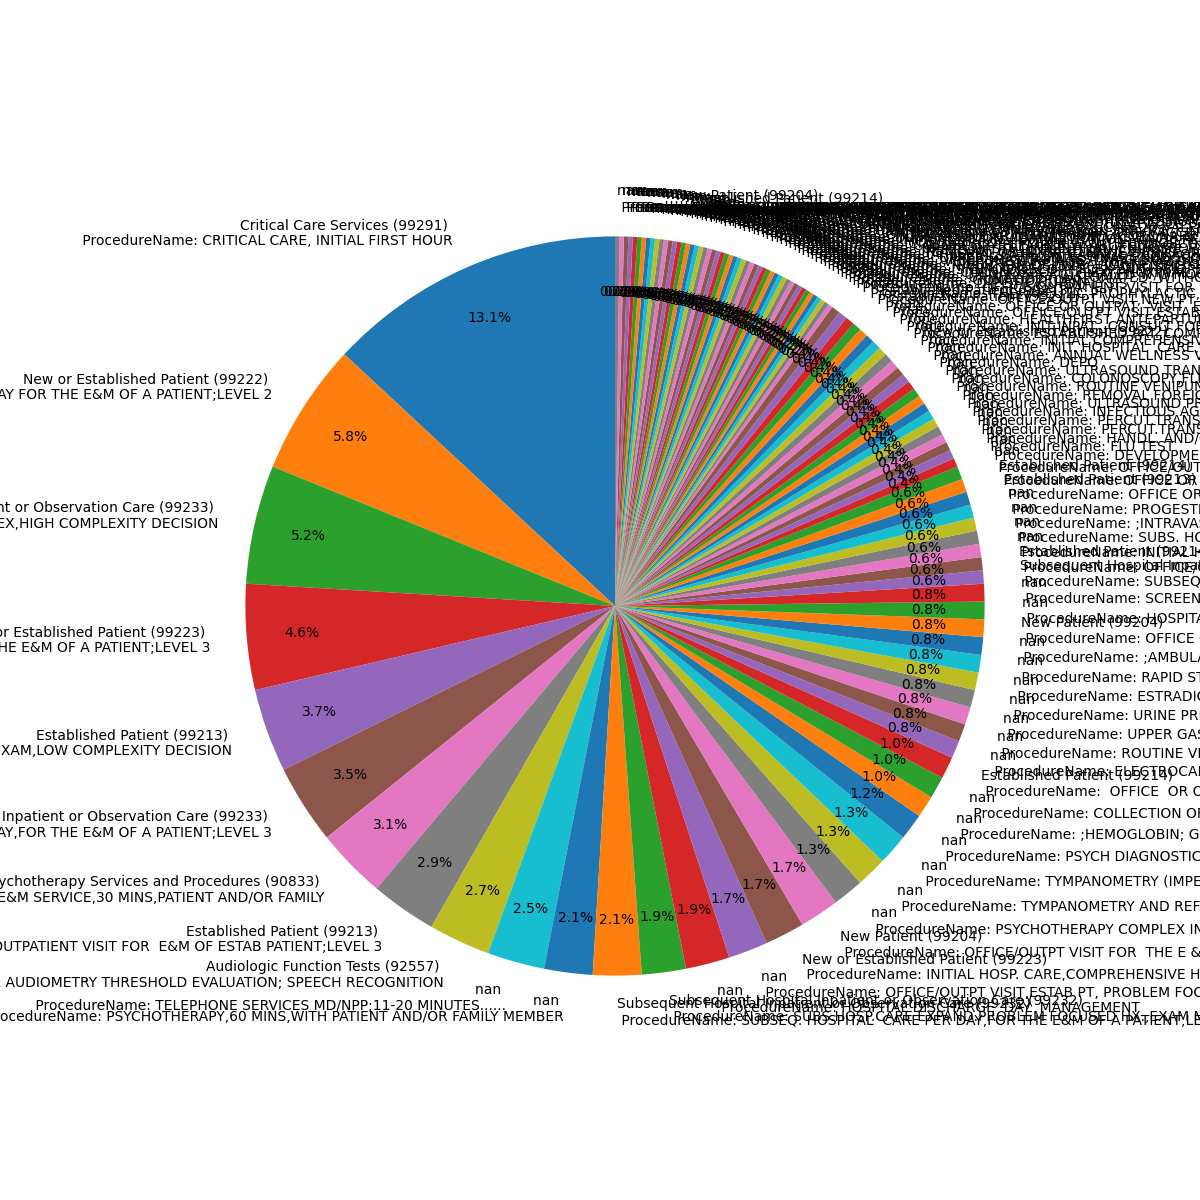





**Question 5: Service Location Analysis**
- How many claims were submitted for each PlaceOfService?
- What percentage of claims are for "INPATIENT" vs "DOCTOR'S OFFICE"?

Amoung all INPATIENT and DOCTOR's VISIT claims, Most claims are from INPATIENT with a total of 231 claims, accounting for 63.3% of the claims.

[Place Of Service ananlysis](https://colab.research.google.com/drive/1icj8OZbOBw5vzR8iNJG8oOQLReIV12na#scrollTo=Jh1TJdNQ5Y8e&line=1&uniqifier=1)

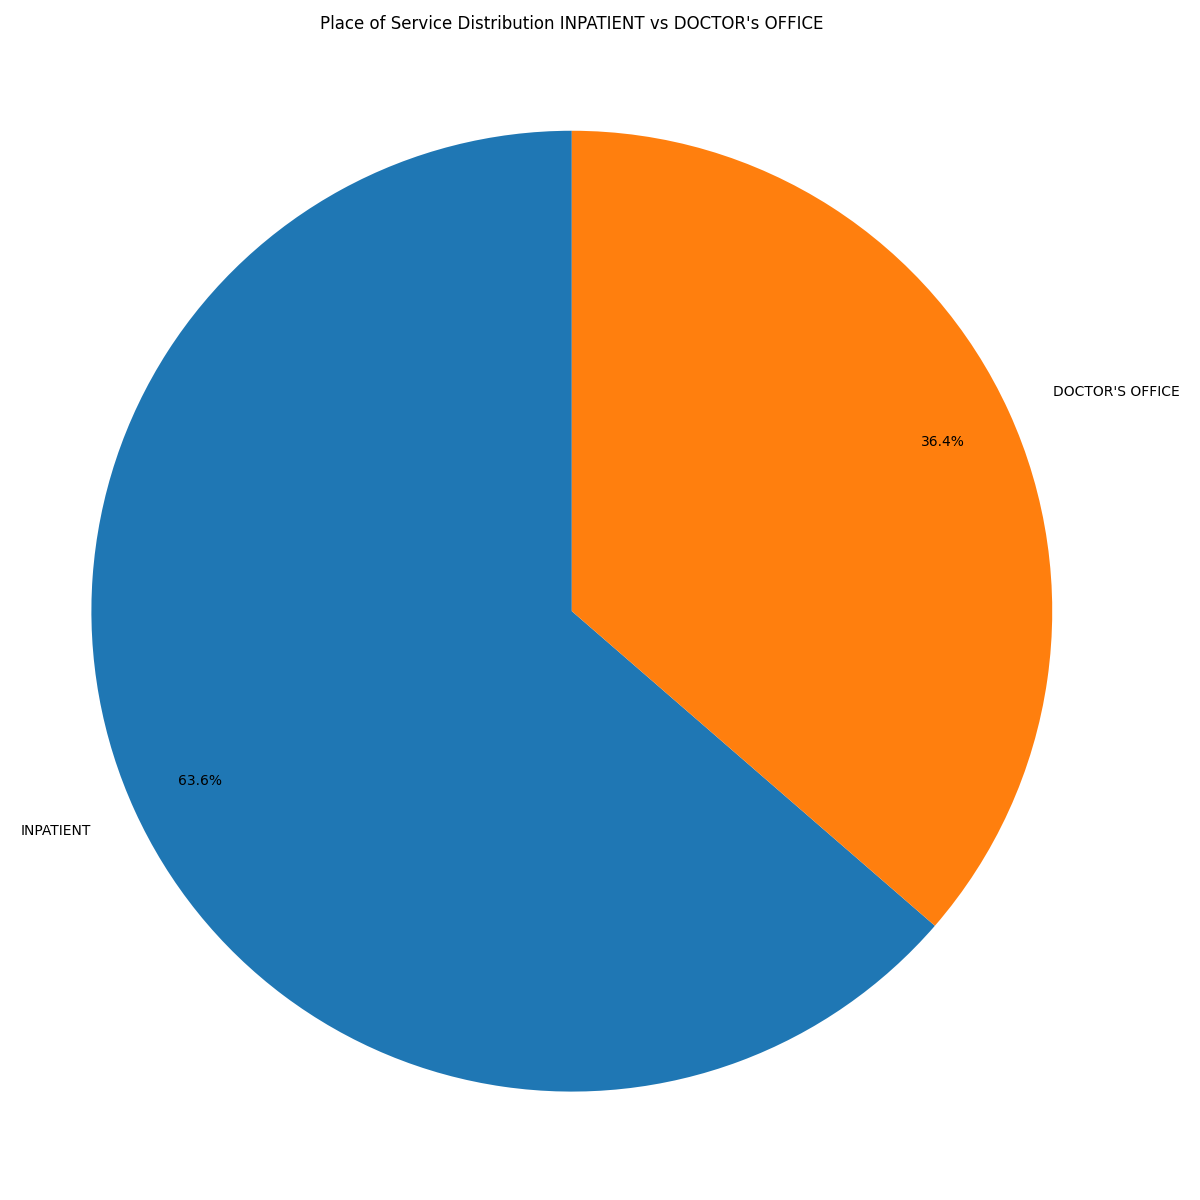



After running the code above, copy the output string (it will be very long) and paste it into a new Markdown cell. When you render that Markdown cell, your chart should appear reliably.

### Part 3: Advanced Analysis with Joins

**Question 6: Claims with High Service Line Counts**
- Merge the HEADER and LINE files
- Calculate the total number of service lines per claim
- Identify claims with 5 or more service lines
- Display: ClaimId, Provider name, number of lines, and total charges



In [165]:
# Merge header and line(HCPCS) data
# Ensure df_merge_header_line contains 'Charges' and 'Units' by merging df_header and df_line

df_merge_header_line = pd.merge(df_header, df_line, on='ProspectiveClaimId', how='left')
print(df_merge_header_line.shape)


(520, 70)


In [166]:
# Total Service lines per Claim
service_lines_per_claim = df_merge_header_line
service_lines_per_claim = service_lines_per_claim.groupby('ProspectiveClaimId').size().reset_index(name='num_service_lines')
service_lines_per_claim = service_lines_per_claim.sort_values(by='num_service_lines', ascending=False)
print(service_lines_per_claim)

     ProspectiveClaimId  num_service_lines
151            36794825                  7
125            36740402                  6
79             36668119                  6
135            36757684                  5
109            36710175                  5
..                  ...                ...
31             36171362                  1
32             36171398                  1
33             36230316                  1
34             36248906                  1
3              35249003                  1

[388 rows x 2 columns]


In [167]:
# Identify claims with 5 or more service lines
claims_with_5_or_more_service_lines = service_lines_per_claim[service_lines_per_claim['num_service_lines'] >= 5]
print(claims_with_5_or_more_service_lines)

     ProspectiveClaimId  num_service_lines
151            36794825                  7
125            36740402                  6
79             36668119                  6
135            36757684                  5
109            36710175                  5


In [168]:


# Display, ClaimId, Provider Name, Number of Lines, and Total Charges
df_merge_header_line['TotalCharges'] = df_merge_header_line['Charges'] * df_merge_header_line['Units']

# Concatenate 'RenderingProvFirstName' and 'RenderingProvLastName' into a new column 'concatenated_col'
# using .agg() on the selected columns and a lambda function
df_merge_header_line['RenderingProvFullName'] = df_merge_header_line[['RenderingProvLastName','RenderingProvFirstName']].agg(', '.join, axis=1)

# Display: ClaimId, Provider name, number of lines, and total charges
display_cols=['ProspectiveClaimId','RenderingProvFullName','LinePos','TotalCharges']
print(df_merge_header_line[display_cols])



     ProspectiveClaimId RenderingProvFullName  LinePos  TotalCharges
0              35216986         GU , YUEHJIEN        1          1155
1              35235657         GU , YUEHJIEN        1          1155
2              35249003         GU , YUEHJIEN        1          1155
3              35249014         GU , YUEHJIEN        1          1155
4              35249016         GU , YUEHJIEN        1          1155
..                  ...                   ...      ...           ...
515            36980985       PATNAIK , ARANI        1           405
516            36983189      D'SOUZA , LIONEL        1          1100
517            36989515     FERRER CNM, VANDY        1           260
518            36989577     FERRER CNM, VANDY        1           160
519            36989619     FERRER CNM, VANDY        1           260

[520 rows x 4 columns]


**Question 7: Diagnosis-Procedure Combinations**
- Create a merged dataset linking claims to both procedures and diagnoses
- Find the most common diagnosis code (CodeValue) associated with CPT code 99291
- Hint: You'll need to merge all three files together


In [169]:
# Merge all data (header, line, and code)
df_merge_header_line_code = pd.merge(df_merge_header_line, df_code, on='ProspectiveClaimId', how='left')
print(df_merge_header_line_code.shape)
df_merge_header_line_code_99291 = df_merge_header_line_code
# Find the most commong diagnosis assocaiated to CPT code 99291 - Critical Care Services
df_merge_header_line_code_99291 = df_merge_header_line_code[df_merge_header_line_code['HCPCS'] == '99291']
df_merge_header_line_code_99291 = df_merge_header_line_code_99291.groupby('CodeValue').size().reset_index(name='claim_count').sort_values(by='claim_count', ascending=False)
code_name_mapping = {
     'J96.01': 'Acute respiratory failure with hypoxia (J96.01)',
     'E78.5': 'Hyperlipidemia, unspecified (E78.5)',
     'I10': 'Essential (primary) hypertension (I10)',
     'G93.5': 'Compression of brain (G93.5)',
     'D64.9': 'Anemia, unspecified (D64.9)',
     'I60.8': 'Other nontraumatic intracranial hemorrhage (I60.8)',
    'I95.9': 'Hypotension, unspecified (I95.9)',
     'I61.9': 'Nontraumatic intracerebral hemorrhage, unspecified (I61.9)',
    'D72.829': 'Elevated white blood cell count, unspecified (D72.829)',
    'I67.848': 'Other cerebrovascular vasospasm and vasoconstriction (I67.848)',
}

# Map the CodeValue to CodeName
df_merge_header_line_code_99291['CodeName'] = df_merge_header_line_code_99291['CodeValue'].map(code_name_mapping)
df_merge_header_line_code_99291 = df_merge_header_line_code_99291.sort_values(by='claim_count', ascending=False)
df_merge_header_line_code_99291.head(10)



(1896, 80)


CodeValue  claim_count                                           CodeName
74    J96.01           53    Acute respiratory failure with hypoxia (J96.01)
38     G93.5           34                       Compression of brain (G93.5)
18     E78.5           33                Hyperlipidemia, unspecified (E78.5)
53     I61.9           26  Nontraumatic intracerebral hemorrhage, unspeci...
7      D64.9           25                        Anemia, unspecified (D64.9)
50     I60.8           24  Other nontraumatic intracranial hemorrhage (I6...
40       I10           24             Essential (primary) hypertension (I10)
67     I95.9           20                   Hypotension, unspecified (I95.9)
11   D72.829           19  Elevated white blood cell count, unspecified (...
66   I67.848           17  Other cerebrovascular vasospasm and vasoconstr...

Text(0, 0.5, 'ICD-10 Code Name')

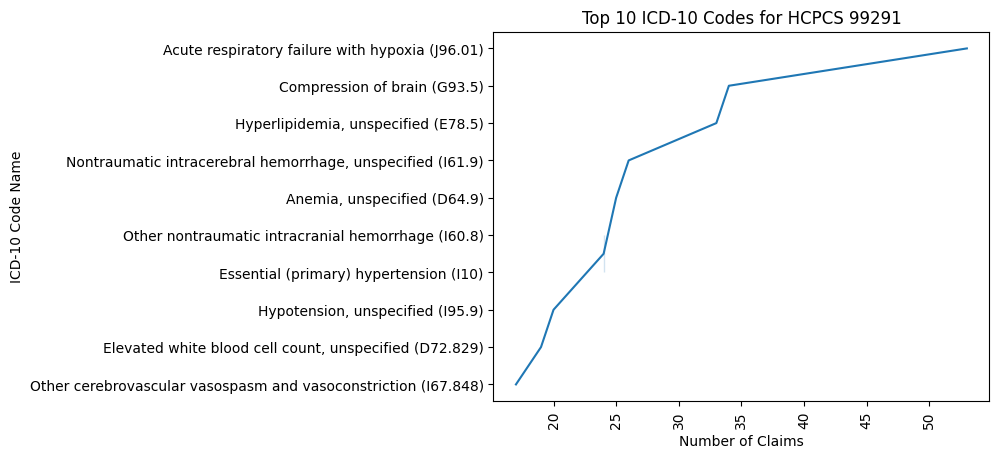

In [170]:
# Line Chart of all claims with HCPCS (99292) top 10 -ICD-10 codes Values
sns.lineplot(x='claim_count', y='CodeName', data=df_merge_header_line_code_99291.head(10))
plt.xticks(rotation=90)
plt.title('Top 10 ICD-10 Codes for HCPCS 99291')
plt.xlabel('Number of Claims')
plt.ylabel('ICD-10 Code Name')

**Question 8: Charges by Payer**
- Merge HEADER and LINE files
- Calculate total charges (sum of all line charges) per claim
- Group by PrimaryPayerName and calculate:
  - Total charges
  - Average charges per claim
  - Number of claims
- Sort by total charges descending and display top 10 payers

     ProspectiveClaimId RenderingProvFullName  NumLines  TotalCharges  \
151            36794825        ARFEEN , IESHA         7          1163   
125            36740402     KRAVIS NP, ELISSA         6           945   
79             36668119     KRAVIS NP, ELISSA         6          1030   
135            36757684     KRAVIS NP, ELISSA         5           873   
109            36710175     KRAVIS NP, ELISSA         5           873   
..                  ...                   ...       ...           ...   
31             36171362         GU , YUEHJIEN         1          1155   
32             36171398         GU , YUEHJIEN         1          1155   
33             36230316         GU , YUEHJIEN         1          1155   
34             36248906         GU , YUEHJIEN         1          1155   
3              35249003         GU , YUEHJIEN         1          1155   

     AvgTotalCharges  
151       166.142857  
125       157.500000  
79        171.666667  
135       174.600000  
109     

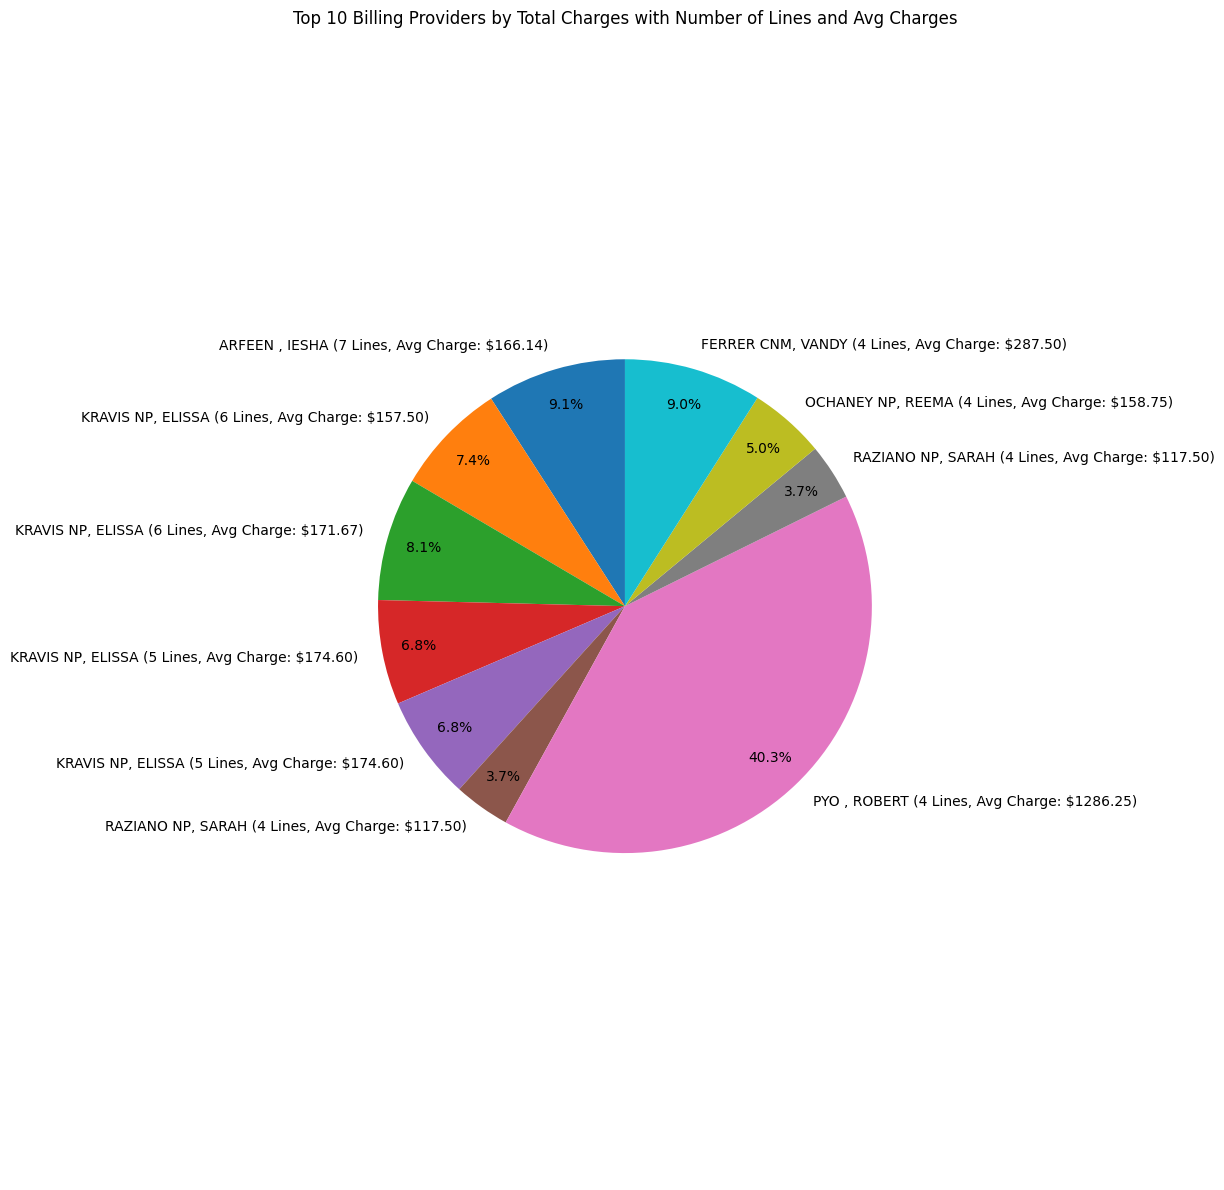

In [171]:

# Make a copy of merged df_merge_header_line
df_provider_charges = df_merge_header_line
# Create Place holder column for agg function to calculate average total charges by provider
df_provider_charges['AvgTotalCharges']=df_provider_charges['TotalCharges']
df_provider_charges

# Sum of all charges to one row
df_provider_charges = df_provider_charges.groupby(['ProspectiveClaimId','RenderingProvFullName']).agg({'LinePos': 'size', 'TotalCharges': 'sum','AvgTotalCharges': 'mean'}).reset_index()
df_provider_charges = df_provider_charges.rename(columns={'LinePos': 'NumLines'})
df_provider_charges = df_provider_charges.sort_values(by='NumLines', ascending=False)
print(df_provider_charges)

# Get top 10 billing providers for the pie chart
top_10_providers = df_provider_charges.head(10)

# Create custom labels including provider name, number of lines, and average total charges
pie_labels = [
    f"{row['RenderingProvFullName']} ({int(row['NumLines'])} Lines, Avg Charge: ${row['AvgTotalCharges']:.2f})"
    for index, row in top_10_providers.iterrows()
]

# Display in pie chart of top 10 billing providers
plt.figure(figsize=(12, 12))
plt.pie(top_10_providers['TotalCharges'],
        labels=pie_labels,
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85)
plt.title('Top 10 Billing Providers by Total Charges with Number of Lines and Avg Charges')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


### Part 4: Creative Analysis  

**Question 9: Your Own Analysis**
Develop and answer your own analytical question using the claims data. Your question should:
- Require merging at least two of the three files
- Use groupby or aggregation
- Provide meaningful insight about the data
- Include at least one visualization

Examples of questions you could explore:
- Among the to 5 billing providers what is the most common procedure with the most complex diagnosis (highest number of diagnosis codes)?


In [172]:
top_5_billing_providers = df_merge_header_line_code
top_5_billing_providers = top_5_billing_providers.groupby(['RenderingProvFullName','RenderingProviderNPI']).size().reset_index(name='num_claims')
top_5_billing_providers = top_5_billing_providers.sort_values(by='num_claims', ascending=False)
top_5_billing_providers = top_5_billing_providers.head(5)
top_5_billing_providers


RenderingProvFullName  RenderingProviderNPI  num_claims
14         GU , YUEHJIEN            1902082209         660
32     OCHANEY NP, REEMA            1467003202          98
1         ARFEEN , IESHA            1598393688          96
31    NASEER MBBS, ZAHRA            1295152353          74
38       SALEHI , MASHAL            1265701296          69

In [173]:
top_5_billing_provider_cases = df_merge_header_line_code
# Filter top_5_billing_provider_cases to include only rows where 'RenderingProviderNPI' is present in top_5_billing_providers['RenderingProviderNPI']
top_5_billing_provider_cases = top_5_billing_provider_cases[top_5_billing_provider_cases['RenderingProvFullName'].isin(top_5_billing_providers['RenderingProvFullName'])]
top_5_billing_provider_cases = top_5_billing_provider_cases.groupby(['RenderingProvFullName','RenderingProviderNPI','HCPCS','ClientProcedureName']).size().reset_index(name='num_procedures')
top_5_billing_provider_cases = top_5_billing_provider_cases.sort_values(by='num_procedures', ascending=False)

# Display unique provider NPIs
top_5_billing_provider_cases['RenderingProviderNPI'].unique()

top_5_billing_provider_cases


# Filter top_10_diagnosis_codes_for_top_5_billing_provider_cases to include only rows where 'HCPCS' is present in top_5_billing_provider_cases['HCPCS']
top_10_diagnosis_codes_for_top_5_billing_provider_cases = df_merge_header_line_code
top_10_diagnosis_codes_for_top_5_billing_provider_cases
top_10_diagnosis_codes_for_top_5_billing_provider_cases = top_10_diagnosis_codes_for_top_5_billing_provider_cases[top_10_diagnosis_codes_for_top_5_billing_provider_cases['HCPCS'].isin(top_5_billing_provider_cases.head(10)['HCPCS'])]
top_10_diagnosis_codes_for_top_5_billing_provider_cases = top_10_diagnosis_codes_for_top_5_billing_provider_cases.groupby(['RenderingProvFullName','RenderingProviderNPI','CodeValue','HCPCS']).size().reset_index(name='num_diagnosis_codes')
top_10_diagnosis_codes_for_top_5_billing_provider_cases = top_10_diagnosis_codes_for_top_5_billing_provider_cases.sort_values(by='num_diagnosis_codes', ascending=False)
top_10_diagnosis_codes_for_top_5_billing_provider_cases.head(10)



code_name_mapping = {
      'J96.01': 'Acute respiratory failure with hypoxia (J96.01)',
      'E78.5': 'Hyperlipidemia, unspecified (E78.5)',
      'I10': 'Essential (primary) hypertension (I10)',
      'G93.5': 'Compression of brain (G93.5)',
      'D64.9': 'Anemia, unspecified (D64.9)',
      'I60.8': 'Other nontraumatic intracranial hemorrhage (I60.8)',
      'I95.9': 'Hypotension, unspecified (I95.9)',
      'I61.9': 'Nontraumatic intracerebral hemorrhage, unspecified (I61.9)',
      'D72.829': 'Elevated white blood cell count, unspecified (D72.829)',
      'I67.848': 'Other cerebrovascular vasospasm and vasoconstriction (I67.848)',
      'E03.9': 'Hypothyroidism, unspecified (E03.9)',
      'I61.5': 'Nontraumatic intracerebral hemorrhage, intraventricular (I61.5)',
      'G93.6': 'Cerebral edema (G93.6)',
      'R56.9': 'Unspecified convulsions (R56.9)',
      'R45.1':'Restlessness and agitation(R45.1)'
}

# Map the CodeValue to CodeName
top_10_diagnosis_codes_for_top_5_billing_provider_cases['CodeName'] = top_10_diagnosis_codes_for_top_5_billing_provider_cases['CodeValue'].map(code_name_mapping)
top_10_diagnosis_codes_for_top_5_billing_provider_cases.head (15)



RenderingProvFullName  RenderingProviderNPI CodeValue  HCPCS  \
161         GU , YUEHJIEN            1902082209    J96.01  99291   
119         GU , YUEHJIEN            1902082209     G93.5  99291   
97          GU , YUEHJIEN            1902082209     E78.5  99291   
139         GU , YUEHJIEN            1902082209     I61.9  99291   
83          GU , YUEHJIEN            1902082209     D64.9  99291   
134         GU , YUEHJIEN            1902082209     I60.8  99291   
122         GU , YUEHJIEN            1902082209       I10  99291   
153         GU , YUEHJIEN            1902082209     I95.9  99291   
89          GU , YUEHJIEN            1902082209   D72.829  99291   
152         GU , YUEHJIEN            1902082209   I67.848  99291   
90          GU , YUEHJIEN            1902082209     E03.9  99291   
177         GU , YUEHJIEN            1902082209     R45.1  99291   
120         GU , YUEHJIEN            1902082209     G93.6  99291   
137         GU , YUEHJIEN            1902082209     I61.5  99291   
178         GU , YUEHJIEN            1902082209     R56.9  99291   

     num_diagnosis_codes                                           CodeName  
161                   53    Acute respiratory failure with hypoxia (J96.01)  
119                   34                       Compression of brain (G93.5)  
97                    33                Hyperlipidemia, unspecified (E78.5)  
139                   26  Nontraumatic intracerebral hemorrhage, unspeci...  
83                    25                        Anemia, unspecified (D64.9)  
134                   24  Other nontraumatic intracranial hemorrhage (I6...  
122                   24             Essential (primary) hypertension (I10)  
153                   20                   Hypotension, unspecified (I95.9)  
89                    19  Elevated white blood cell count, unspecified (...  
152                   17  Other cerebrovascular vasospasm and vasoconstr...  
90                    16                Hypothyroidism, unspecified (E03.9)  
177                   16                  Restlessness and agitation(R45.1)  
120                   15                             Cerebral edema (G93.6)  
137                   14  Nontraumatic intracerebral hemorrhage, intrave...  
178                   14                    Unspecified convulsions (R56.9)

(np.float64(-1.0999999918385819),
 np.float64(1.1000000014797389),
 np.float64(-1.0999999723151659),
 np.float64(1.0999999986816746))

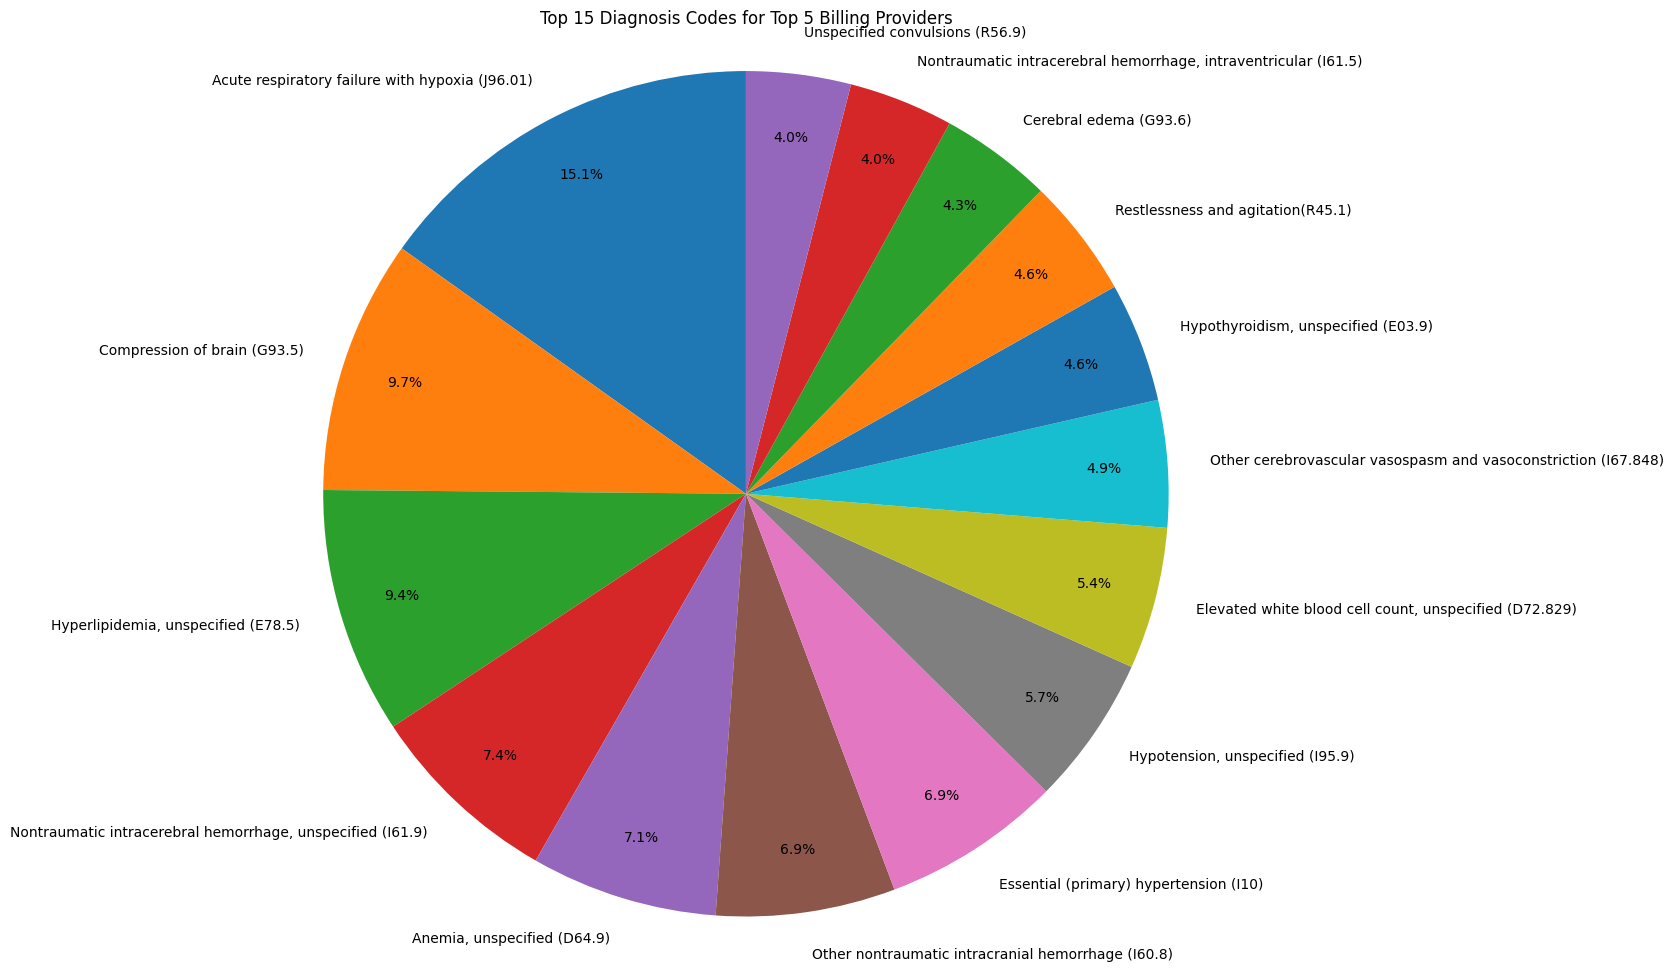

In [174]:
# plot pie chart
plt.figure(figsize=(12, 12))
plt.pie(top_10_diagnosis_codes_for_top_5_billing_provider_cases.head(15)['num_diagnosis_codes'],
        labels=top_10_diagnosis_codes_for_top_5_billing_provider_cases.head(15)['CodeName'],
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85)
plt.title('Top 15 Diagnosis Codes for Top 5 Billing Providers')
plt.axis('equal')